# Part I - Loan dataset
## by Nguyen Ngau Thu

## Introduction


This is a loans dataset from Prosper with 113937 observations and 81 variables, and through this dataset, we can explore more of the loan profiles together with their correlation with expected return for investors and actual cost of the loans for the borrowers.



## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#!pip3 install plotly


## Loading the dataset, checking data content and data type. 



In [2]:
#Read the data in
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
pd.set_option('display.max_columns', None)
#check the top rows to get a glimpse of the data
loans.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [4]:
print(loans.shape)

(113937, 81)


In [5]:
#Glimpse of the dataset
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?


> The dataset is provided by Udacity on Prosper loan, including 113 937 observations, each corresponds to a loan profile, 
and 81 columns, each corresponds to a characteristics of a loan such as loan terms and loan statuses.There are quite many columns, so we only need to use a subset of columns of interest.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in my dataset are the lender estimated effective yield and borrower APR.I want to know what loans characteristics will return the highest lender estimated effective yield for investors and what loan characteristics will give the lowest borrower APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect both categorical (Loan terms, Loan status,ListingCategory,BorrowerState,Occupation,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange)  and numerical factors (DebtToIncomeRatio, PercentFunded, number of Investors,StatedMonthlyIncome) to help me uncover more insights into lender yield and borrower APR.

In [6]:
#Create a subset of the dataset

##Columns of interest

loans.columns
cols = ['Term', 'LoanStatus','LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 
       'ProsperRating (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 
       'IsBorrowerHomeowner',   'ListingCategory (numeric)',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 
       'Investors']

loans_subset = loans[cols]

loans_subset.head()

Term LoanStatus  LoanOriginalAmount  BorrowerAPR  BorrowerRate  \
0    36  Completed                9425      0.16516        0.1580   
1    36    Current               10000      0.12016        0.0920   
2    36  Completed                3001      0.28269        0.2750   
3    36    Current               10000      0.12528        0.0974   
4    36    Current               15000      0.24614        0.2085   

   LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0       0.1380                      NaN            NaN              NaN   
1       0.0820                  0.07960         0.0249          0.05470   
2       0.2400                      NaN            NaN              NaN   
3       0.0874                  0.08490         0.0249          0.06000   
4       0.1985                  0.18316         0.0925          0.09066   

   ProsperRating (numeric) BorrowerState     Occupation EmploymentStatus  \
0                      NaN            CO          Other    Self-employed   
1                      6.0            CO   Professional         Employed   
2                      NaN            GA          Other    Not available   
3                      6.0            GA  Skilled Labor         Employed   
4                      3.0            MN      Executive         Employed   

   IsBorrowerHomeowner  ListingCategory (numeric)  DebtToIncomeRatio  \
0                 True                          0               0.17   
1                False                          2               0.18   
2                False                          0               0.06   
3                 True                         16               0.15   
4                 True                          2               0.26   

      IncomeRange  IncomeVerifiable  StatedMonthlyIncome  Investors  
0  $25,000-49,999              True          3083.333333        258  
1  $50,000-74,999              True          6125.000000          1  
2   Not displayed              True          2083.333333         41  
3  $25,000-49,999              True          2875.000000        158  
4       $100,000+              True          9583.333333         20

In [7]:
#Check data type
loans_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   LoanOriginalAmount         113937 non-null  int64  
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   LenderYield                113937 non-null  float64
 6   EstimatedEffectiveYield    84853 non-null   float64
 7   EstimatedLoss              84853 non-null   float64
 8   EstimatedReturn            84853 non-null   float64
 9   ProsperRating (numeric)    84853 non-null   float64
 10  BorrowerState              108422 non-null  object 
 11  Occupation                 110349 non-null  object 
 12  EmploymentStatus           111682 non-null  object 
 13  IsBorrowerHomeowner        11

In [8]:
#make IsBorrowerHomeowner category
loans_subset=loans_subset.astype({'IsBorrowerHomeowner':'category'})

### Categorical variables

Among the borrowers, are there many homeowners? are most of the incomes verifiable?

#### IsBorrowerHomeowner and IncomeVerifiable
> The number of homeowners are quite on the same level with the number of non-homeowners in the dataset.
> Most of the income is verifiable.




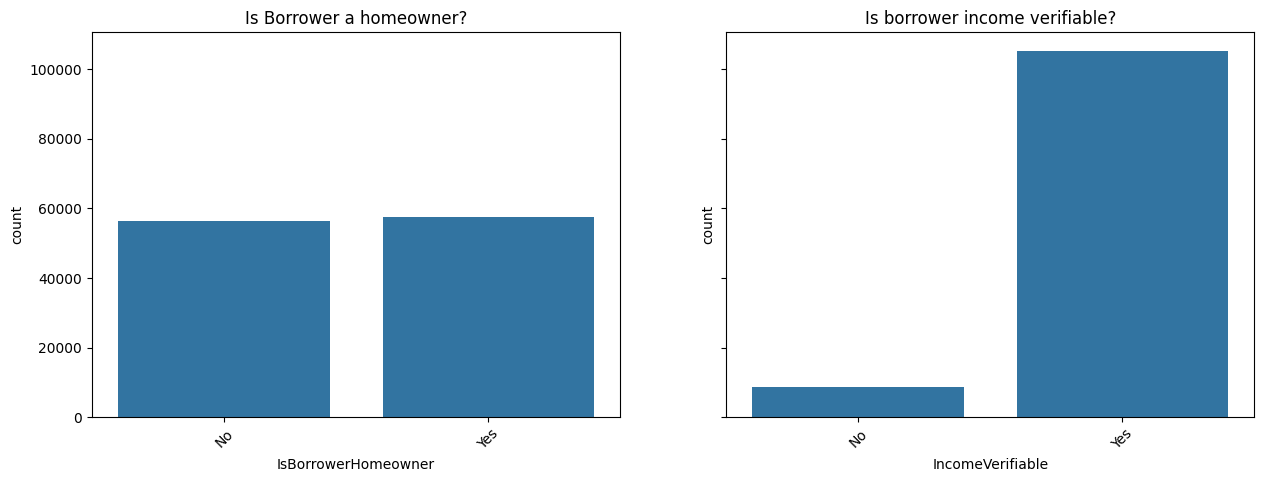

In [9]:

#Create visualization function bar chart
def draw_bar_vertical(dat,var,title,axs):
    # Choose the first tuple of RGB color
    base_color = sns.color_palette()[0]
    sns.countplot(data = dat,x = var, color =base_color,ax = axs).set_title(title);

#Borrower characteristics - 2 values

borrower_variable = ['IsBorrowerHomeowner','IncomeVerifiable']
borrower_TFtitle = ['Is Borrower a homeowner?','Is borrower income verifiable?']

    
fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
axs = axes.flatten()
for i,ax in enumerate(axs):
    draw_bar_vertical(dat = loans_subset,var = borrower_variable[i] , title = 'Distribution of ' + borrower_variable[i],axs = ax)
    ax.set_xticklabels(['No','Yes'])
    ax.set_title(borrower_TFtitle[i])
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

#### Loan terms
What is the most popular loan term?

Based on the bar plot below, the most popular loan term is 36 months.

Text(0.5, 1.0, 'Prosper loan terms of 36 months is the most popular')

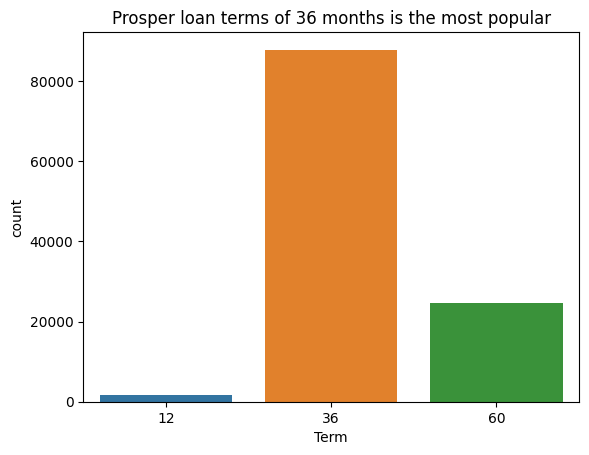

In [10]:
#Plot loan terms

sns.countplot(data= loans_subset,x='Term')

plt.title('Prosper loan terms of 36 months is the most popular')

#### Income ranges
How's about income ranges? 
Annual income of most borrowers fall under 74 999 dollars. Very few are unemployed (0 dollar income)

Text(0.5, 1.0, 'Annual income of most borrowers fall under 74 999 dollars')

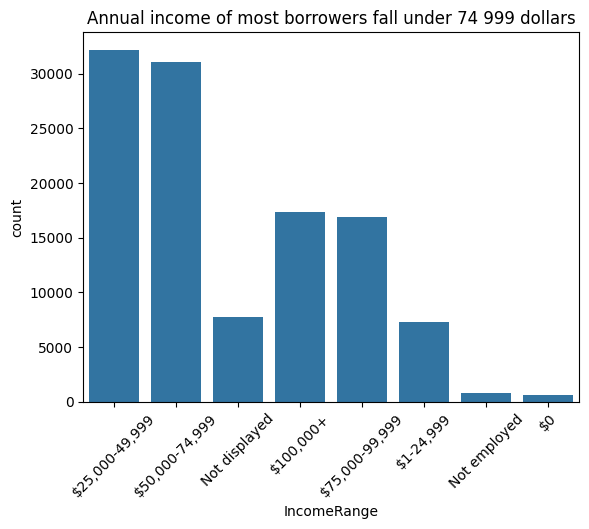

In [11]:
#Income range
income_range = sns.countplot(data = loans_subset,x = 'IncomeRange', color =sns.color_palette()[0]);
#rotate x-axis
income_range.set_xticklabels(income_range.get_xticklabels(), rotation=45)

plt.title('Annual income of most borrowers fall under 74 999 dollars')

#### Employment Status
For employment status I will group some values to simplify the investigation. Based on the bar chart below, most of loan profiles are employed

In [12]:
loans_subset['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [13]:
#Impute values for missing rows
loans_subset.loc[loans_subset['EmploymentStatus'].isna(),'EmploymentStatus']='Not available'

Text(0.5, 1.0, 'Most of the borrowers are employed')

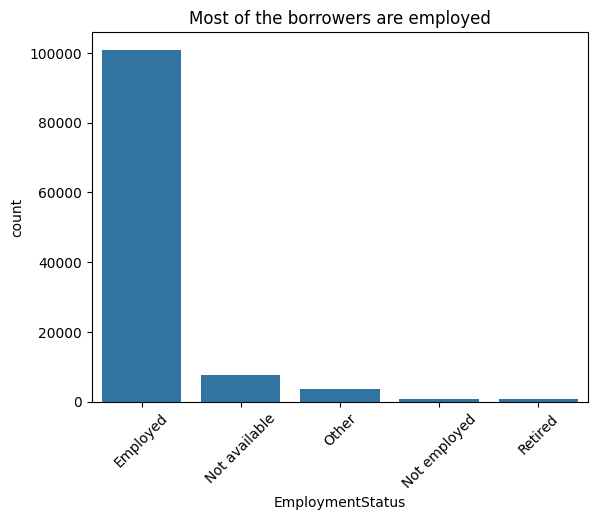

In [14]:
#group the past due loan status

loans_subset.loc[loans_subset['EmploymentStatus'].str.contains('Full'),'EmploymentStatus'] = 'Employed'
loans_subset.loc[loans_subset['EmploymentStatus'].str.contains('Self'),'EmploymentStatus'] = 'Employed'

loans_subset.loc[loans_subset['EmploymentStatus'].str.contains('Part'),'EmploymentStatus'] = 'Employed'


#Employment status
income_range = sns.countplot(data = loans_subset,x = 'EmploymentStatus', color =sns.color_palette()[0]);
#rotate x-axis
income_range.set_xticklabels(income_range.get_xticklabels(), rotation=45)
#set title
income_range.set_title('Most of the borrowers are employed')

Text(0.5, 1.0, 'Distribution of loan status')

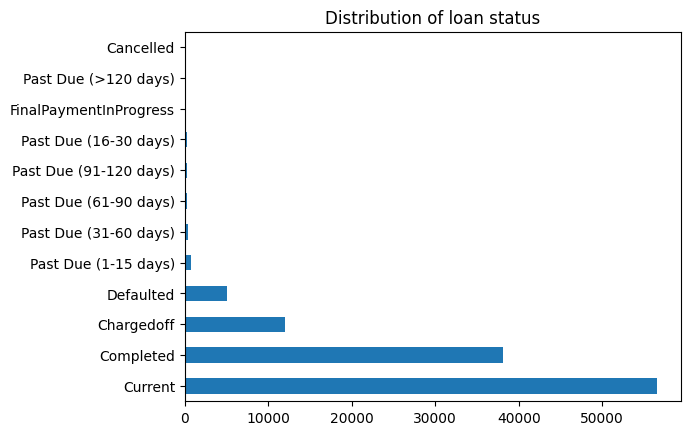

In [15]:
#Try the bar chart for loan status
#We will need to group all 'Past due' loan statuses
loans_subset['LoanStatus'].value_counts(sort = True).plot(kind ='barh')
plt.title('Distribution of loan status')

#### Loan status

For loan status, we group values into 5 main groups: current, completed, defaulted and chargedoff, past due and out of scope.

In [16]:
#group the past due loan status

loans_subset.loc[loans_subset['LoanStatus'].str.contains('Past Due'),'LoanStatus'] = 'Past due'
loans_subset.loc[loans_subset['LoanStatus'].str.contains('FinalPaymentInProgress|Cancelled'),'LoanStatus'] = 'Out of scope'
loans_subset.loc[loans_subset['LoanStatus'].str.contains('Defaulted|Chargedoff'),'LoanStatus'] = 'Defaulted and chargedoff'

In [17]:
#Check the loan status groups again
loans_subset['LoanStatus'].value_counts()

Current                     56576
Completed                   38074
Defaulted and chargedoff    17010
Past due                     2067
Out of scope                  210
Name: LoanStatus, dtype: int64

Text(0.5, 1.0, 'Distribution of loan status after loan status restructure')

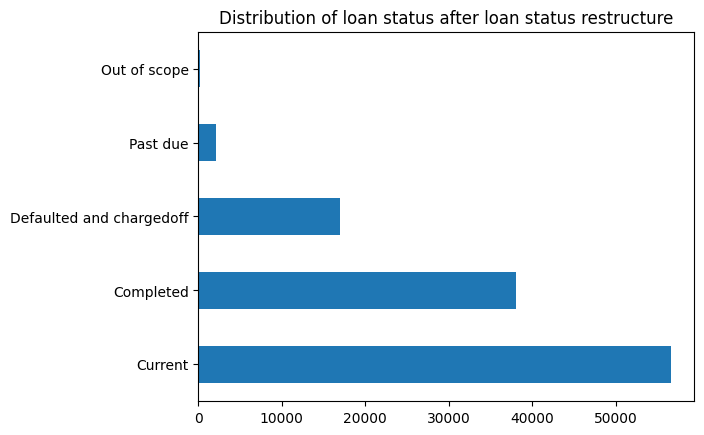

In [18]:
#Plotting the bar chart again for loan status again
loans_subset['LoanStatus'].value_counts(sort = True).plot(kind ='barh')
plt.title('Distribution of loan status after loan status restructure')

### Borrower state


We use state abbreviation data from the link below to enrich the us state abbreviation. Based on the summary below, the largest amount of loan comes from California. 

In [19]:
#get enriched state name for borrower state
us_states = pd.read_csv('https://t2a.io/assets/blog-move/uploads/2014/02/US_States.csv', delimiter=',',encoding='latin-1')

loans_subset_state = pd.merge(loans_subset,us_states,how = 'inner',left_on='BorrowerState',right_on='ANSI Code')
#rename column English
loans_subset_state.rename(columns={'English': 'US states'}, inplace=True)
loans_subset_state['US states'].value_counts(sort = True)

California              14717
Texas                    6842
New York                 6729
Florida                  6720
Illinois                 5921
Georgia                  5008
Michigan                 3593
Virginia                 3278
New Jersey               3097
North Carolina           3084
Washington               3048
Pennsylvania             2972
Maryland                 2821
Missouri                 2615
Minnesota                2318
Massachusetts            2242
Colorado                 2210
Indiana                  2078
Arizona                  1901
Wisconsin                1842
Oregon                   1817
Tennessee                1737
Alabama                  1679
Connecticut              1627
South Carolina           1122
Nevada                   1090
Kansas                   1062
Kentucky                  983
Oklahoma                  971
Louisiana                 954
Utah                      877
Arkansas                  855
Mississippi               787
Nebraska  

### Loan reasons

Based on the listing category chart below, outside the reason of debt consolidation, home improvement, business and auto are the 3 most popular loan reasons. This does make sense since these seems to be among the biggest spendings and investments.

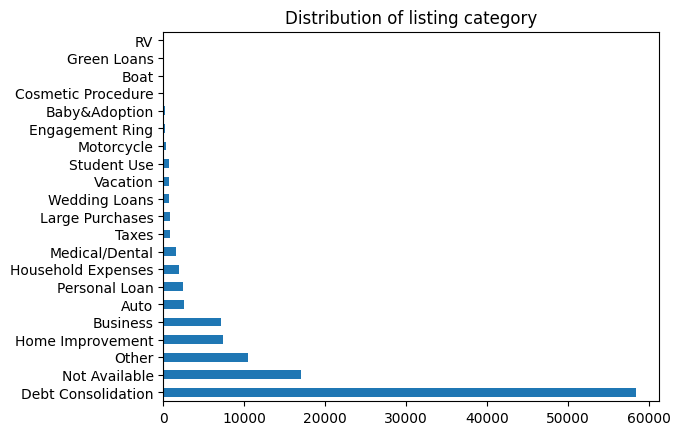

In [20]:
yticks = ['Debt Consolidation','Not Available','Other','Home Improvement','Business','Auto','Personal Loan','Household Expenses','Medical/Dental','Taxes','Large Purchases','Wedding Loans','Vacation','Student Use','Motorcycle','Engagement Ring','Baby&Adoption','Cosmetic Procedure','Boat','Green Loans','RV']
listingCat = loans_subset['ListingCategory (numeric)'].value_counts(sort = True).plot(kind = 'barh')
listingCat.set_yticklabels(yticks)

plt.title('Distribution of listing category')
plt.show()

### Prosper rating 

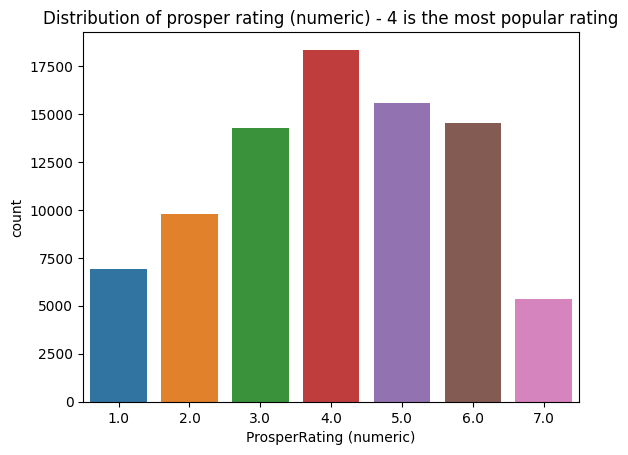

In [21]:
sns.countplot(data=loans_subset,x='ProsperRating (numeric)')
plt.title('Distribution of prosper rating (numeric) - 4 is the most popular rating')

plt.show()

### Numeric variables
#### Stated monthly income
> Since the stated monthly income is very right-skewed, I need to limit the range of the bins to ensure visibility into the distribution of the stated monthly income. Around 5000 dollars seems to be the most popular stated monthly income provided for the loan.


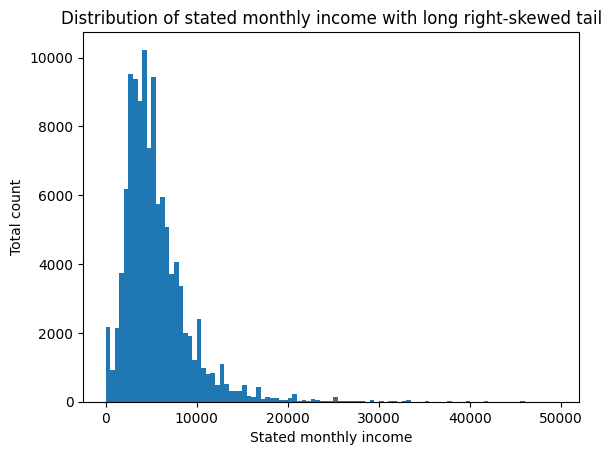

In [22]:
#Stated monthly income
income_bins = np.arange(0,50000,500)
plt.hist(data = loans_subset, x = 'StatedMonthlyIncome',bins = income_bins)
plt.xlabel('Stated monthly income')
plt.ylabel('Total count')
plt.title('Distribution of stated monthly income with long right-skewed tail')
plt.show()


#### Loan investors
> Similarly, I need to limit the range of the bins to ensure visibility into the distribution of the number of investors. Based on the histogram, it does seem that 0-20 investors is the most popular number of investors for a loan.


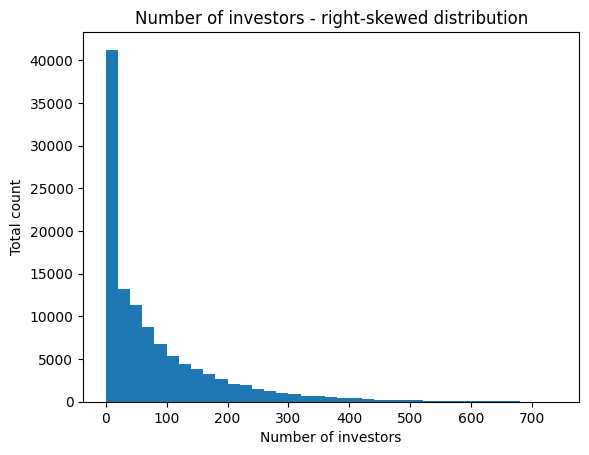

In [23]:

#Number of investors
investor_bins = np.arange(0,754,20)
plt.hist(data = loans_subset, x = 'Investors',bins = investor_bins)
plt.xlabel('Number of investors')
plt.ylabel('Total count')
plt.title('Number of investors - right-skewed distribution')
plt.show()

#### Lender yield
> The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee. The most common lender yield is between 0.1 and 0.2

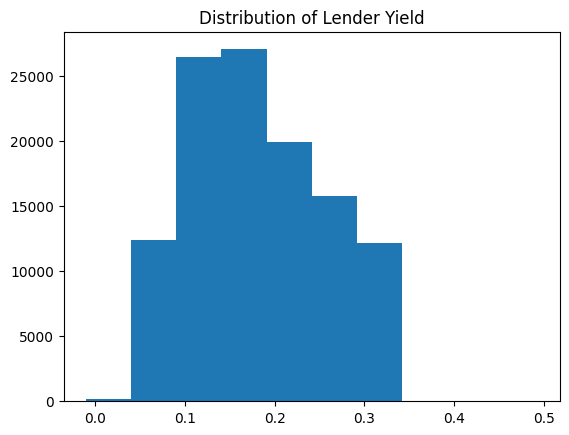

In [24]:
plt.hist(data = loans_subset,x='LenderYield')
plt.title('Distribution of Lender Yield')
plt.show()

#### Estimated Effective Yield: 
Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009. (data dictionary).

Distribution of estimated effective yield looks quite normal, and most of estimated effective yield falls between 0.1 and 0.2. The left tail of estimated effective yield seems to be longer, as compared with lender yield. This is understandable since it takes into account estimated uncollected interest on charge-offs and estimated collected late fees.

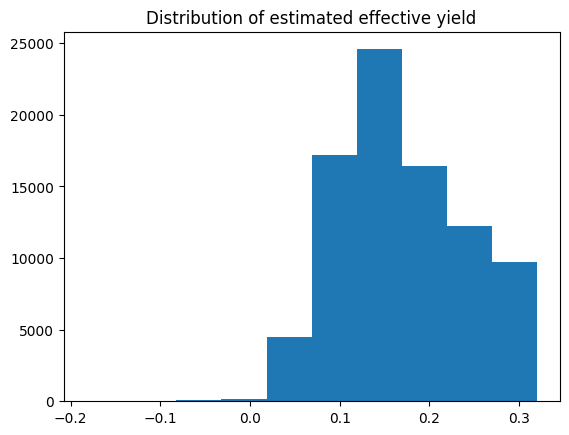

In [25]:
plt.hist(data = loans_subset,x ='EstimatedEffectiveYield')
plt.title('Distribution of estimated effective yield')
plt.show()

#### Borrower APR

Definition: The Borrower's Annual Percentage Rate (APR) for the loan (data dictionary)
The annual percentage rate (APR) is almost always higher than the interest rate, as it includes other costs associated with borrowing the money.(Investopedia - https://www.investopedia.com/ask/answers/100314/what-difference-between-interest-rate-and-annual-percentage-rate-apr.asp)

Distribution of borrower APR has some different peaks, most interesting is the APR of around 0.35. This might bring some interesting insights to look into this range.

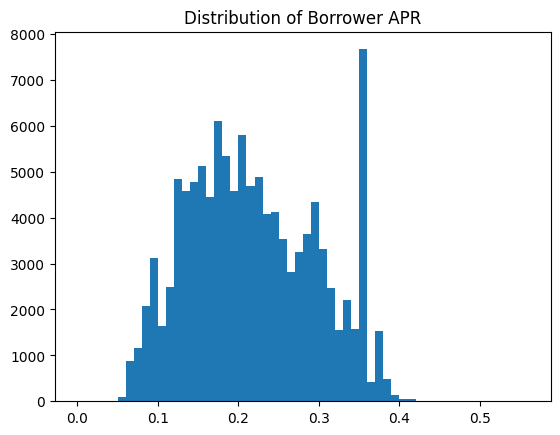

In [26]:
bins = np.arange(0,loans_subset.BorrowerAPR.max()+0.05,0.01)
plt.hist(data = loans_subset, x='BorrowerAPR',bins=bins)
plt.title('Distribution of Borrower APR')
plt.show()

#### Estimated return
The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.



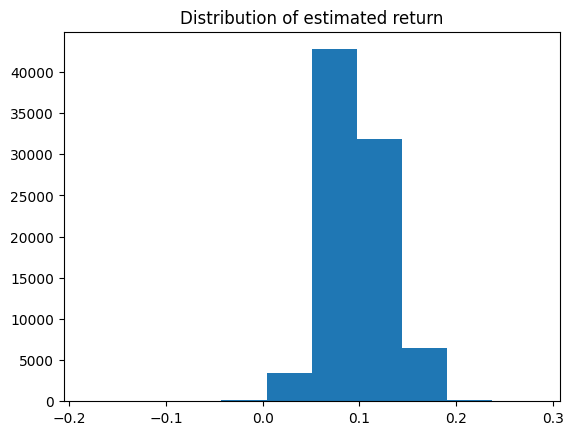

In [27]:
plt.hist(data = loans_subset, x = 'EstimatedReturn')
plt.title('Distribution of estimated return')
plt.show()

#### Debt to income ratio

Based on the distribution below, we can see that the distribution of debt to income reaches its peak at 0.18, and got very right skewed.

In [28]:
#look at the mode
loans_subset.DebtToIncomeRatio.mode()

0    0.18
Name: DebtToIncomeRatio, dtype: float64

/tmp/ipykernel_68/2676140922.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loans_subset.DebtToIncomeRatio,bins = DI_bins)


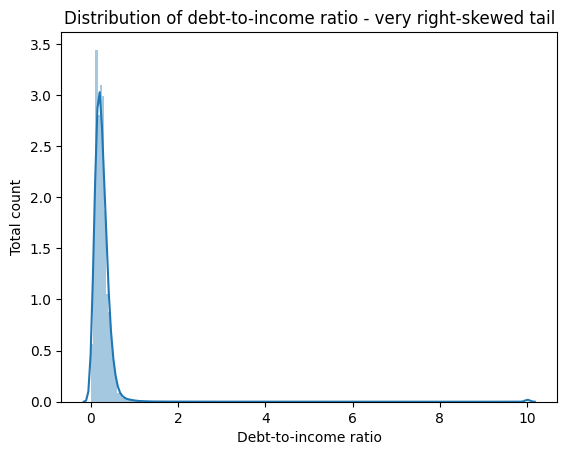

In [29]:
#Debt to income ratio
loans_subset['DebtToIncomeRatio'].describe()
DI_bins = np.arange(0,loans_subset.DebtToIncomeRatio.max()+0.01,0.05)
sns.distplot(loans_subset.DebtToIncomeRatio,bins = DI_bins)
plt.xlabel('Debt-to-income ratio')
plt.ylabel('Total count')

plt.title('Distribution of debt-to-income ratio - very right-skewed tail')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of estimated effective yield is unimodal, and left-skewed tail
 There seems to be some estimated return to be negative, which is expected in an investment model, but it does seem quite like a good investment model, in which the mode of the distribution is between 0.05 (5%) and 0.1 (10%)
 
> The distribution of APR is on the other hand multi-modal with multi peaks, around 0.1, 0.18 and 0.35.
> Regarding the categorical variables, I made a few transformation.

> Even though estimated effective yield and borrower APR are 2 sides of the same coin, their distributions are not identical.

> Variable transformations performed:
loan status: combining past due loan statuses
employment status: combining a few employment statuses to be 'employed' and handling missing values



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Regarding the categorical variables:

> IsHomeOwner: The number of homeowners and non-homeowners are quite the same.

> IncomeVerifiable: Most of the loan profiles have verifiable income, which is expected

> Employment status: Most of the loan profiles are linked to employed status

> Income range: Most yearly incomes fall under 75 000 us dollars

> Loan status: Most of the loan profiles are completed and open, and not so many loan profiles are past due & defaulted

> Listing category: The most popular listing category is debt consolidation, which is quite interesting.

> Regarding the numerical variables:

> Stated monthly income distribution seems quite in line with the yearly income range
Stated monthly income is right skewed, median falls around 5000 dollars

> Estimated return is normal distributed


## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the data including scatter plot, box plot, heat map and stacked bar chart.

> **Rubric Tip**: This part (Bivariate Exploration) should include at least one scatter plot, one box plot, and at least one clustered bar chart or heat map.

In [30]:
#SCatter plot between 2 numerical variables

#box plot between 1 categorical variable and 1 numerical variable

#cluster bar chart between 2 categorical variables



In [31]:
#group variables

numeric_var = ['StatedMonthlyIncome','BorrowerAPR','BorrowerRate','LoanOriginalAmount','EstimatedEffectiveYield','LenderYield','DebtToIncomeRatio']
cat_var = ['IncomeRange','IsHomeOwner','IncomeVerifiable','EmploymentStatus','LoanStatus','LenderYield','ListingCategory (numeric)']

Based on the heatmap below, we can see some correlation between Loan Original Amount and Lender Yield, Estimated Effective Yield, Borrower Rate, Borrower APR and Stated Monthly Income. I will plot the relationship between Loan Original Amount and Estimated Effective Yield using linear graph later.

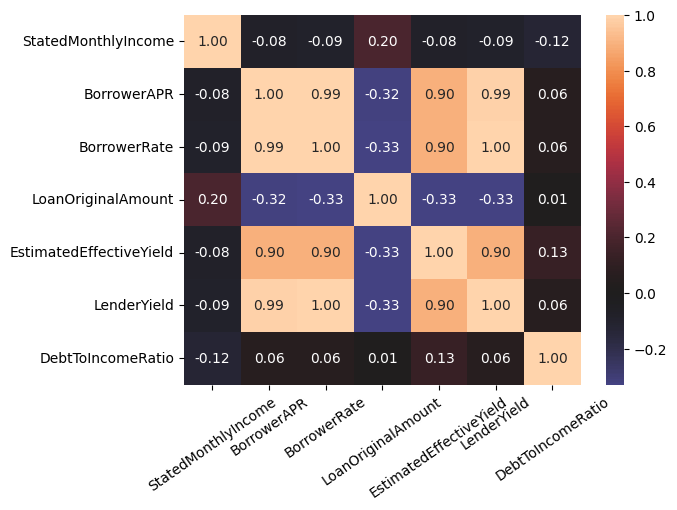

In [32]:
#Heatmap for correlation between all the numerical variables
sns.heatmap(loans_subset[numeric_var].corr(), annot = True, fmt = '0.2f', center = 0)
#rotate xticks
plt.xticks(rotation = 35)
sns.set(font_scale=0.5)
plt.show()

In [33]:
#get enriched state name for borrower state
us_states = pd.read_csv('https://t2a.io/assets/blog-move/uploads/2014/02/US_States.csv', delimiter=',',encoding='latin-1')

loans_subset_state = pd.merge(loans_subset,us_states,how = 'inner',left_on='BorrowerState',right_on='ANSI Code')
#rename column English
loans_subset_state.rename(columns={'English': 'US states'}, inplace=True)
loans_subset_state.groupby(['US states']).agg({'EstimatedEffectiveYield':['count', 'mean']})


EstimatedEffectiveYield          
                                       count      mean
US states                                             
Alabama                                 1187  0.177831
Alaska                                   167  0.164920
Arizona                                 1357  0.167877
Arkansas                                 769  0.180930
California                             10761  0.162620
Colorado                                1729  0.163603
Connecticut                             1492  0.168601
Delaware                                 267  0.159486
District of Columbia                     328  0.154573
Florida                                 5406  0.172312
Georgia                                 3347  0.166815
Hawaii                                   342  0.166781
Idaho                                    403  0.171054
Illinois                                4264  0.163021
Indiana                                 1652  0.171320
Iowa                                       0       NaN
Kansas                                   854  0.175181
Kentucky                                 888  0.176188
Louisiana                                841  0.176120
Maine                                      0       NaN
Maryland                                2241  0.172826
Massachusetts                           1831  0.163345
Michigan                                2622  0.174099
Minnesota                               1715  0.168096
Mississippi                              675  0.179251
Missouri                                1793  0.171793
Montana                                  221  0.166771
Nebraska                                 555  0.170456
Nevada                                  1024  0.173714
New Hampshire                            443  0.171195
New Jersey                              2725  0.169953
New Mexico                               331  0.164333
New York                                5844  0.168316
North Carolina                          2439  0.171589
North Dakota                               0       NaN
Oklahoma                                 732  0.167897
Oregon                                  1214  0.165435
Pennsylvania                            2678  0.173818
Rhode Island                             409  0.168256
South Carolina                           994  0.170075
South Dakota                             189  0.179006
Tennessee                               1538  0.175589
Texas                                   5634  0.166153
Utah                                     522  0.159114
Vermont                                  171  0.174579
Virginia                                2779  0.166328
Washington                              2153  0.165453
West Virginia                            310  0.172831
Wisconsin                               1521  0.167624
Wyoming                                  123  0.174195

I tried to use plotly to visualize the estimated effective yield across us states but there was an error that does not allow me to install: Could not install packages due to an OSError

Therefore, I turned to simply enrich the borrower state with the full name to add more insights to how average estimated effective yield varies across us states. Combining with the count of loans per state, we can see that California has the highest number of loans yet Alabama has the highest average estimated effective yield.


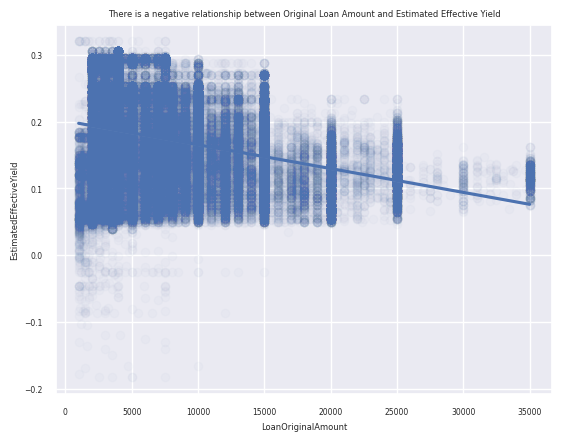

In [34]:
#SCatter plot between 2 numerical variables
#Check the relationship between Estimated Effective Yield and Loan Original Amount
g1 = sns.regplot(data = loans_subset, x = 'LoanOriginalAmount',y= 'EstimatedEffectiveYield',scatter_kws={'alpha': 1/50})

g1.set_title('There is a negative relationship between Original Loan Amount and Estimated Effective Yield')
plt.show()

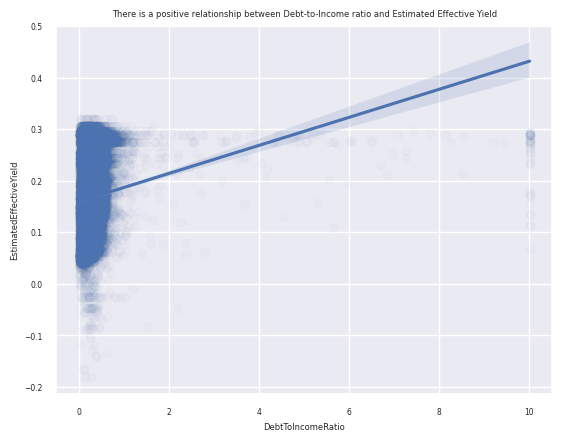

In [35]:
#Check the relationship between Estimated Effective Yield and Debt-to-income ratio
g2 = sns.regplot(data = loans_subset, x = 'DebtToIncomeRatio',y= 'EstimatedEffectiveYield',scatter_kws={'alpha': 1/50})

g2.set_title('There is a positive relationship between Debt-to-Income ratio and Estimated Effective Yield')
plt.show()

In [ ]:
#box plot across categorical variables and numerical variables
base_color = sns.color_palette()[0]
#increase font size of all elements
sns.set(font_scale=4)
g = sns.PairGrid(data = loans_subset, height = 6, x_vars =['Term','IncomeVerifiable','IsBorrowerHomeowner'] ,y_vars=['BorrowerAPR','LoanOriginalAmount','EstimatedEffectiveYield'])
g.map(sns.boxplot,color = base_color)
g.fig.set_size_inches(60,75)
plt.show()

From the box plot pair grid above, regarding the loan term, we can see that the higher the loan term, the higher the average estimated effective yield. Loan term of 12 months has the lowest average estimated effective yield, while the estimated effective yield for loan term of 36 months and 60 months are quite close.

We also see that the higher the loan term, the higher the average original loan amount. The average original loan amount is distintively higher for a loan term of 60 months, as compared with a loan term of 12 months and 36 months. 

Also, as expected, the shorter loan term, the lower average borrower APR gets on average. However, surprisingly, the average borrower APR is a little bit lower when the loan term gets to 36 and 60 months.


Regarding the verification status of the income,the estimated effective yield is interestingly lower on average when income is verifiable. The average original loan amount is higher, and average borrower APR is lower when income is verifiable, which is reasonable.   

Regarding the homeownership status, the estimated effective yield, and borrower APR are lower on average when the borrower is a homeowner. The original loan amount is higher on average when the borrower is a homeowner.

In [ ]:
#Relationship between loan status and estimated effective yield/Lender yield/ Borrower rate/Borrower APR
sns.set(font_scale=4)
g = sns.PairGrid(data = loans_subset, height = 6, x_vars =['LoanStatus'] ,y_vars=['BorrowerAPR','BorrowerRate','LoanOriginalAmount','EstimatedEffectiveYield','LenderYield'])
g.map(sns.boxplot,color = base_color)
g.fig.set_size_inches(60,75)

In [38]:
#Bar chart 
X_var = ['IncomeRange','IsBorrowerHomeowner','IncomeVerifiable','EmploymentStatus','LoanStatus','ListingCategory (numeric)']
hue_var = []

In [39]:
loans_subset['LenderYield'].describe()

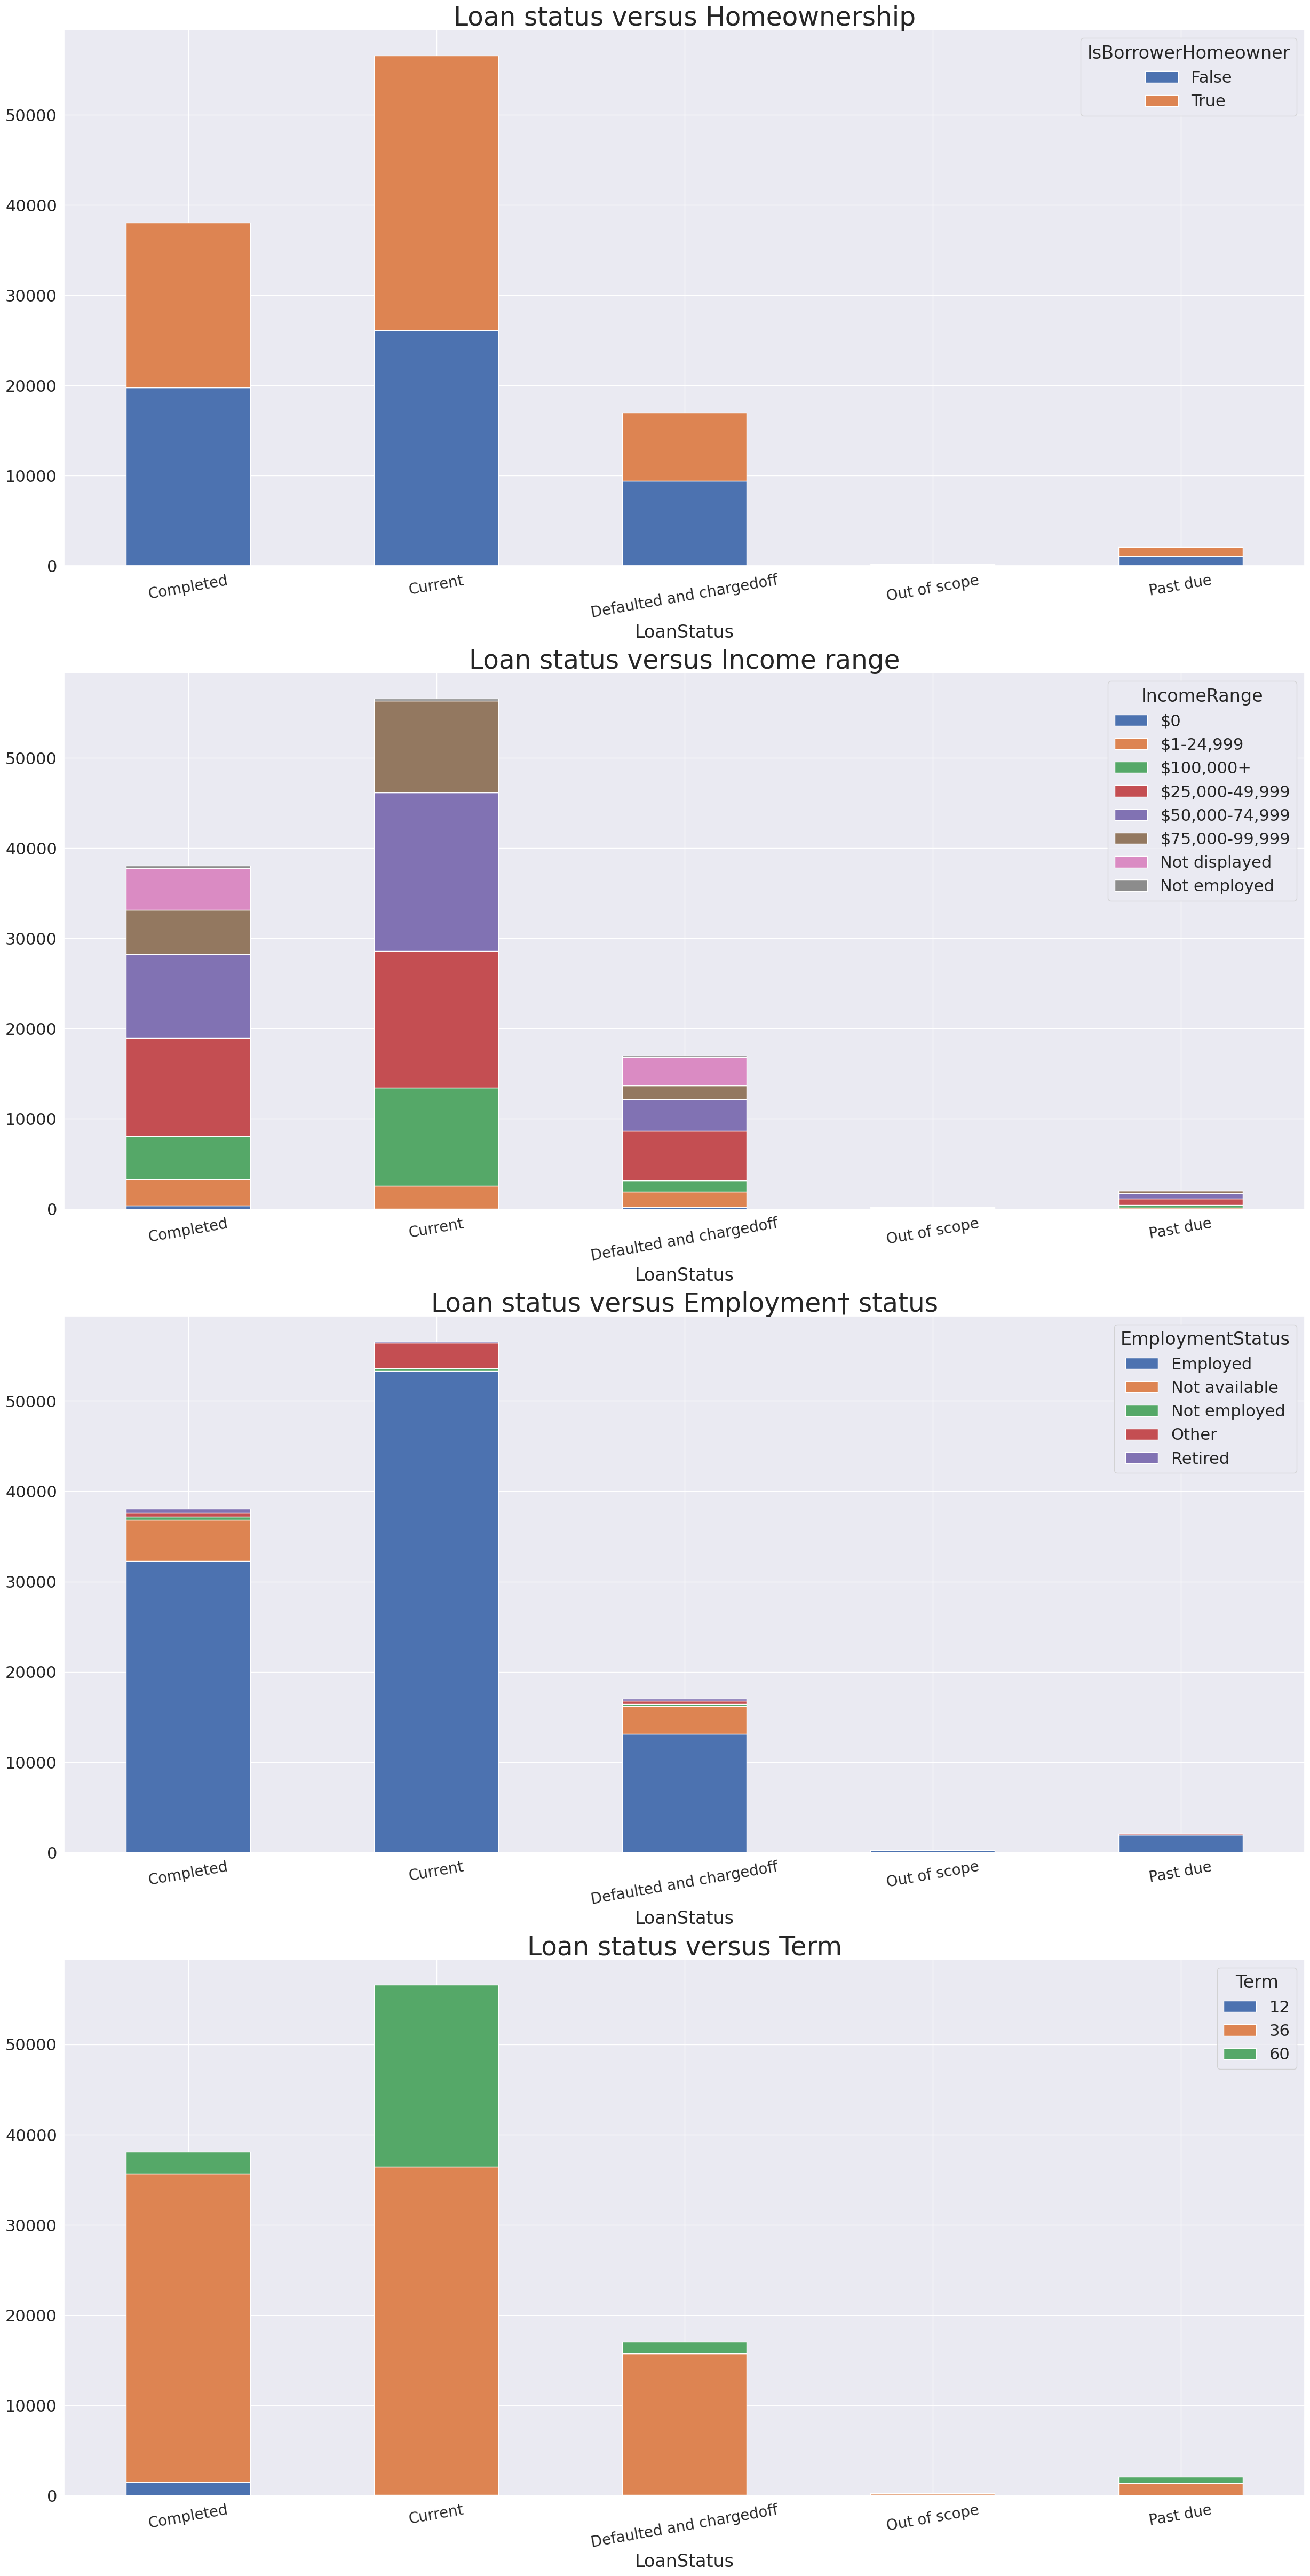

In [66]:
plt.figure(figsize=(30, 60))

ax = plt.subplot(4,1,1)

ax.set_title('Loan status versus Homeownership',fontsize = 35)

#Subplot 1

loans_subset.groupby(['LoanStatus','IsBorrowerHomeowner']).size().reset_index().pivot(columns = 'IsBorrowerHomeowner',index = 'LoanStatus',values = 0).plot(kind = 'bar',stacked = True,ax=ax)
ax.set_xticklabels(['Completed','Current','Defaulted and chargedoff','Out of scope','Past due'],rotation = 10,fontsize = 20)
#Subplot 2
ax = plt.subplot(4,1,2)

ax.set_title('Loan status versus Income range',fontsize = 35)
loans_subset.groupby(['LoanStatus','IncomeRange']).size().reset_index().pivot(columns = 'IncomeRange',index = 'LoanStatus',values = 0).plot(kind = 'bar',stacked = True,ax=ax)
ax.set_xticklabels(['Completed','Current','Defaulted and chargedoff','Out of scope','Past due'],rotation = 10,fontsize = 20)
#Subplot 3
ax = plt.subplot(4,1,3)

ax.set_title('Loan status versus Employmen† status',fontsize = 35)
loans_subset.groupby(['LoanStatus','EmploymentStatus']).size().reset_index().pivot(columns = 'EmploymentStatus',index = 'LoanStatus',values = 0).plot(kind = 'bar',stacked = True,ax=ax)
ax.set_xticklabels(['Completed','Current','Defaulted and chargedoff','Out of scope','Past due'],rotation = 10,fontsize = 20)
#Subplot 4
ax = plt.subplot(4,1,4)  

ax.set_title('Loan status versus Term',fontsize = 35)
loans_subset.groupby(['LoanStatus','Term']).size().reset_index().pivot(columns = 'Term',index = 'LoanStatus',values = 0).plot(kind = 'bar',stacked = True,ax=ax)
ax.set_xticklabels(['Completed','Current','Defaulted and chargedoff','Out of scope','Past due'],rotation = 10,fontsize = 20)

plt.show()

Based on the stacked bar charts, we can see that non-homeowners account for a higher proportion of defaulted loans.

Income range of 25 000 dollars to less than 50 000 dollars makes up the highest proportion of defaulted loans.
As expected, regular predictable income takes up the highest percentage in all the loan statuses.

The defaulted loan terms seem to be fall under the longer terms (36 months and 60 months). 


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> Estimated Effective Yield is closely positively correlated (0.9) with Lender Yield, as expected. It also has a high correlation with BorrowerAPR and BorrowerRate, since Borrower cost and Lender profit are just 2 sides of the same fence. 
The debt-to-income ratio is also positively correlated with the estimated effective yield.

> Borrower APR and Borrower Rate are closely correlated (0.99) since they are both referring to the cost of borrowing.  Both BorrowerAPR and Estimated Effective Yield are negatively correlated with the Original Loan amount (-0.32), suggesting that the higher the loan amount, the lower the borrower cost and the lower the investor profit.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Stated monthly income does seem to have a very low negative correlation with EstimatedEffectiveYield,BorrowerRate,BorrowerAPR and LenderYield. However, stated monthly income does have a positive correlation with OriginalLoanAmount, which does make sense, indicating the higher monthly income you make, the higher loan amount borrowers can acquire.

> Debt-to-income ratio seems to have the highest correlation with Stated Monthly Income (-0.12) and Loan Original Amount (0.13), suggesting the higher the stated monthly income, the lower debt-to-income ratio, and the higher the Loan amount, the higher the debt-to-income ratio.

> Defaulted loans are observed only in longer term (36 and 60 months)

> Non-homeowners are observed a bit more than homeowners for defaulted and chargedoff loans, however, for past due loans
> As expected, regular predictable income takes up the highest percentage in all the loan statuses.

## Multivariate Exploration

> In this part, I create plots of three variables to investigate the data even more with faceted scatter plots violin plot and heatmap.


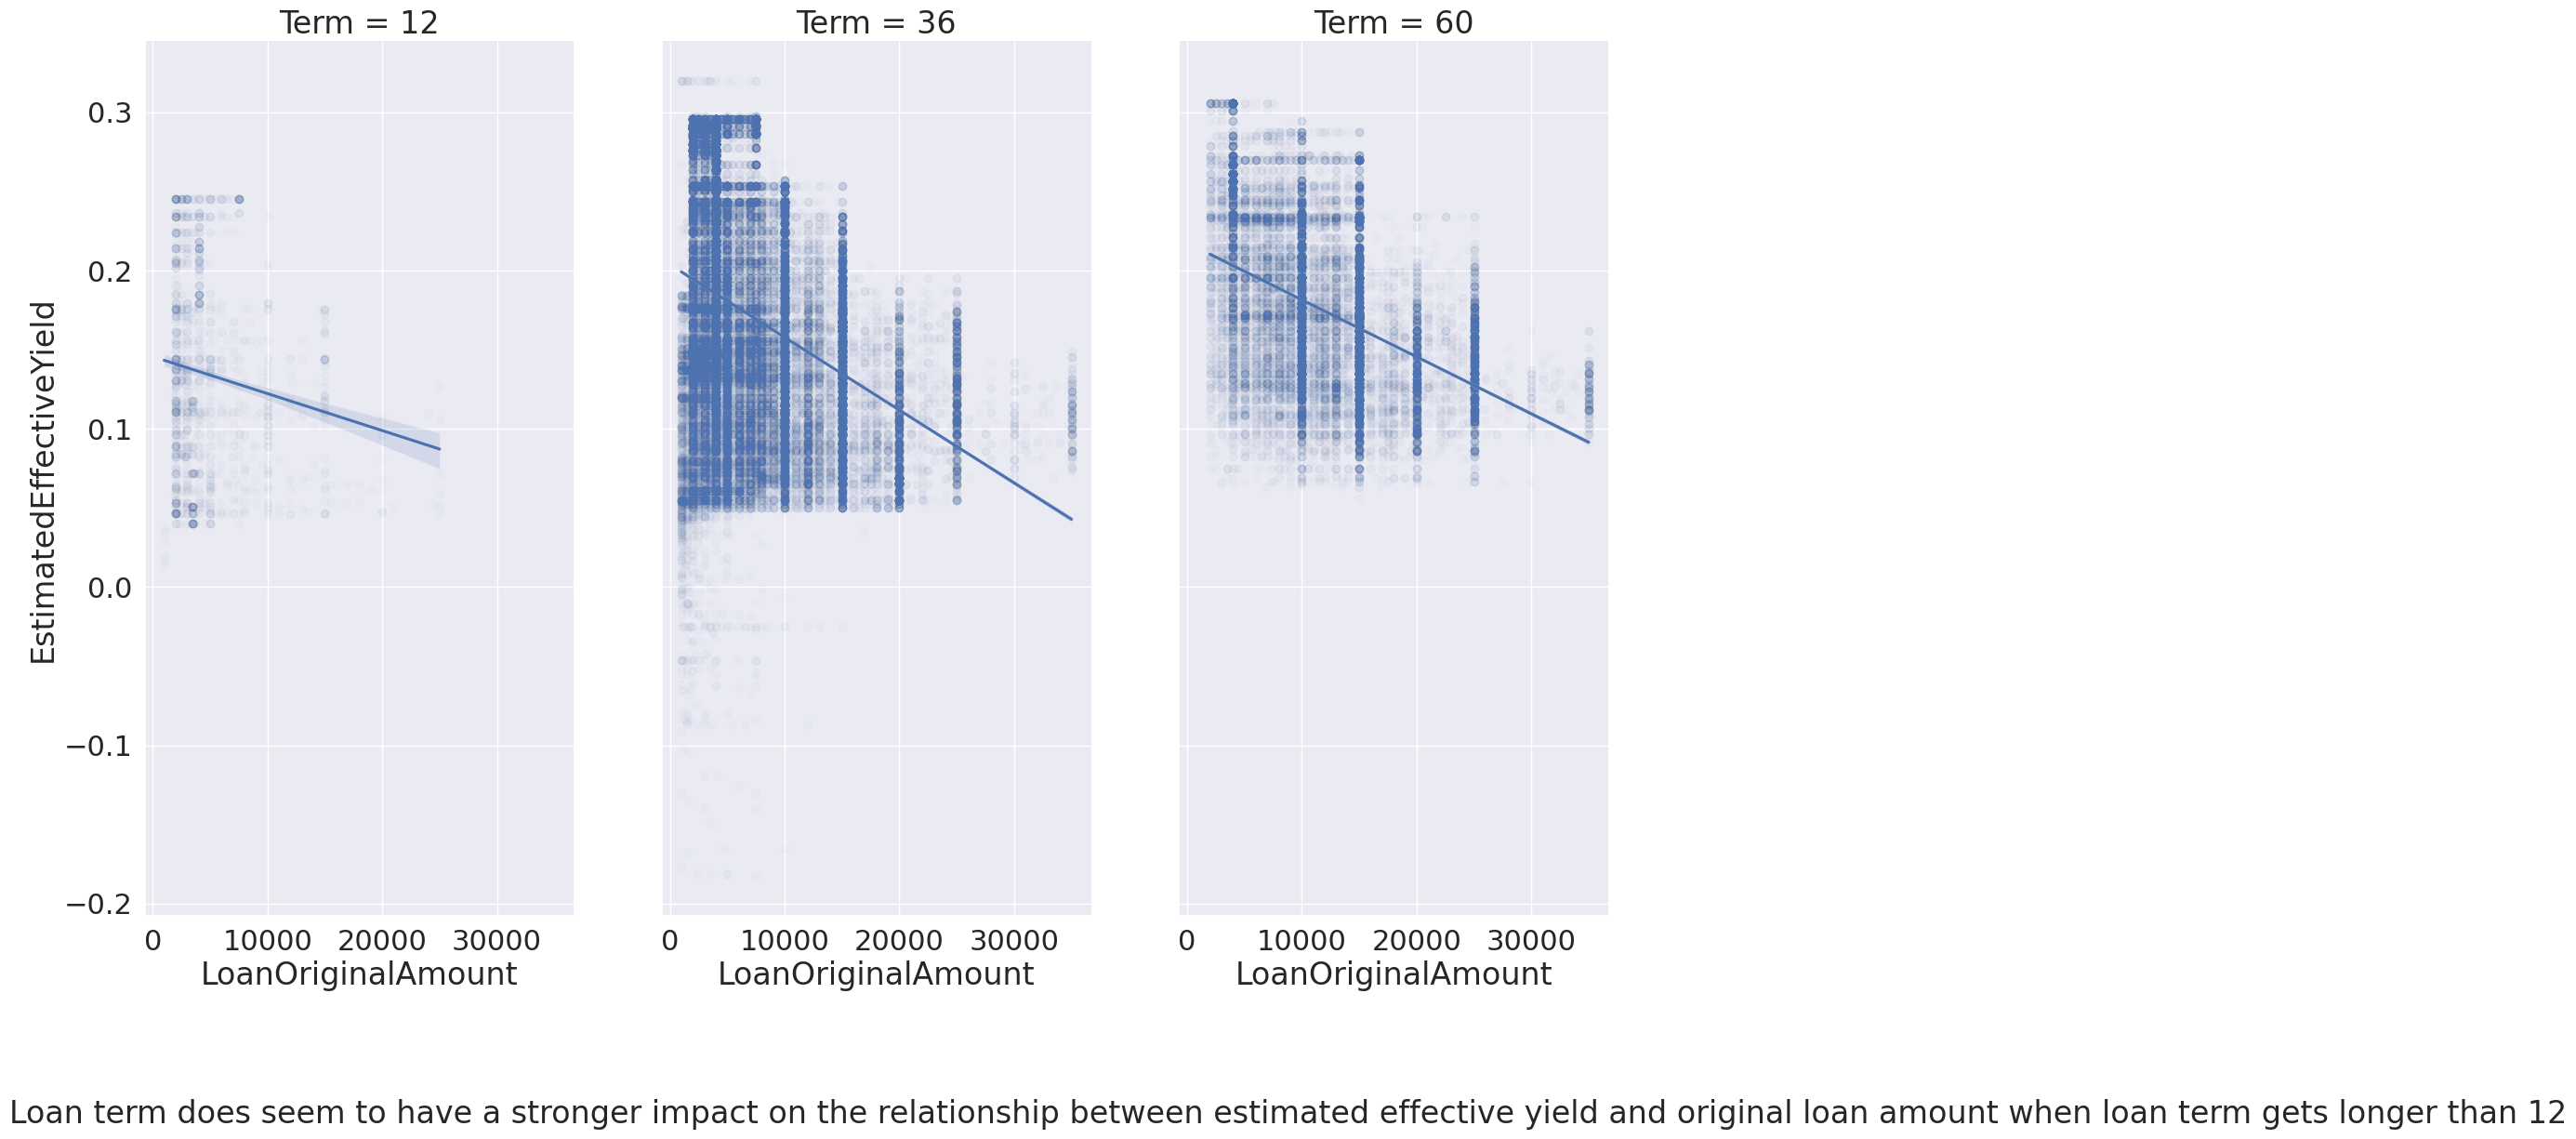

In [64]:
#regression plot across categorical variables and numerical variables
#increase font size of all elements
sns.set(font_scale=2)
g = sns.FacetGrid(data = loans_subset, col ='Term' ,col_wrap = 3)
g.map(sns.regplot,'LoanOriginalAmount','EstimatedEffectiveYield',x_jitter = 0.05, scatter_kws = {'alpha': 0.02})
g.fig.set_size_inches(20,25)
plt.figtext(.1,.3,'Loan term does seem to have a stronger impact on the relationship between estimated effective yield and original loan amount when loan term gets longer than 12')
plt.show()

Based on the plot above, we can see that loan term can have an effect on the relationship between loan original amount and estimated effective yield. There is a stronger relationship between loan original amount and estimated effective yield when loan term is 36 or 60 months.

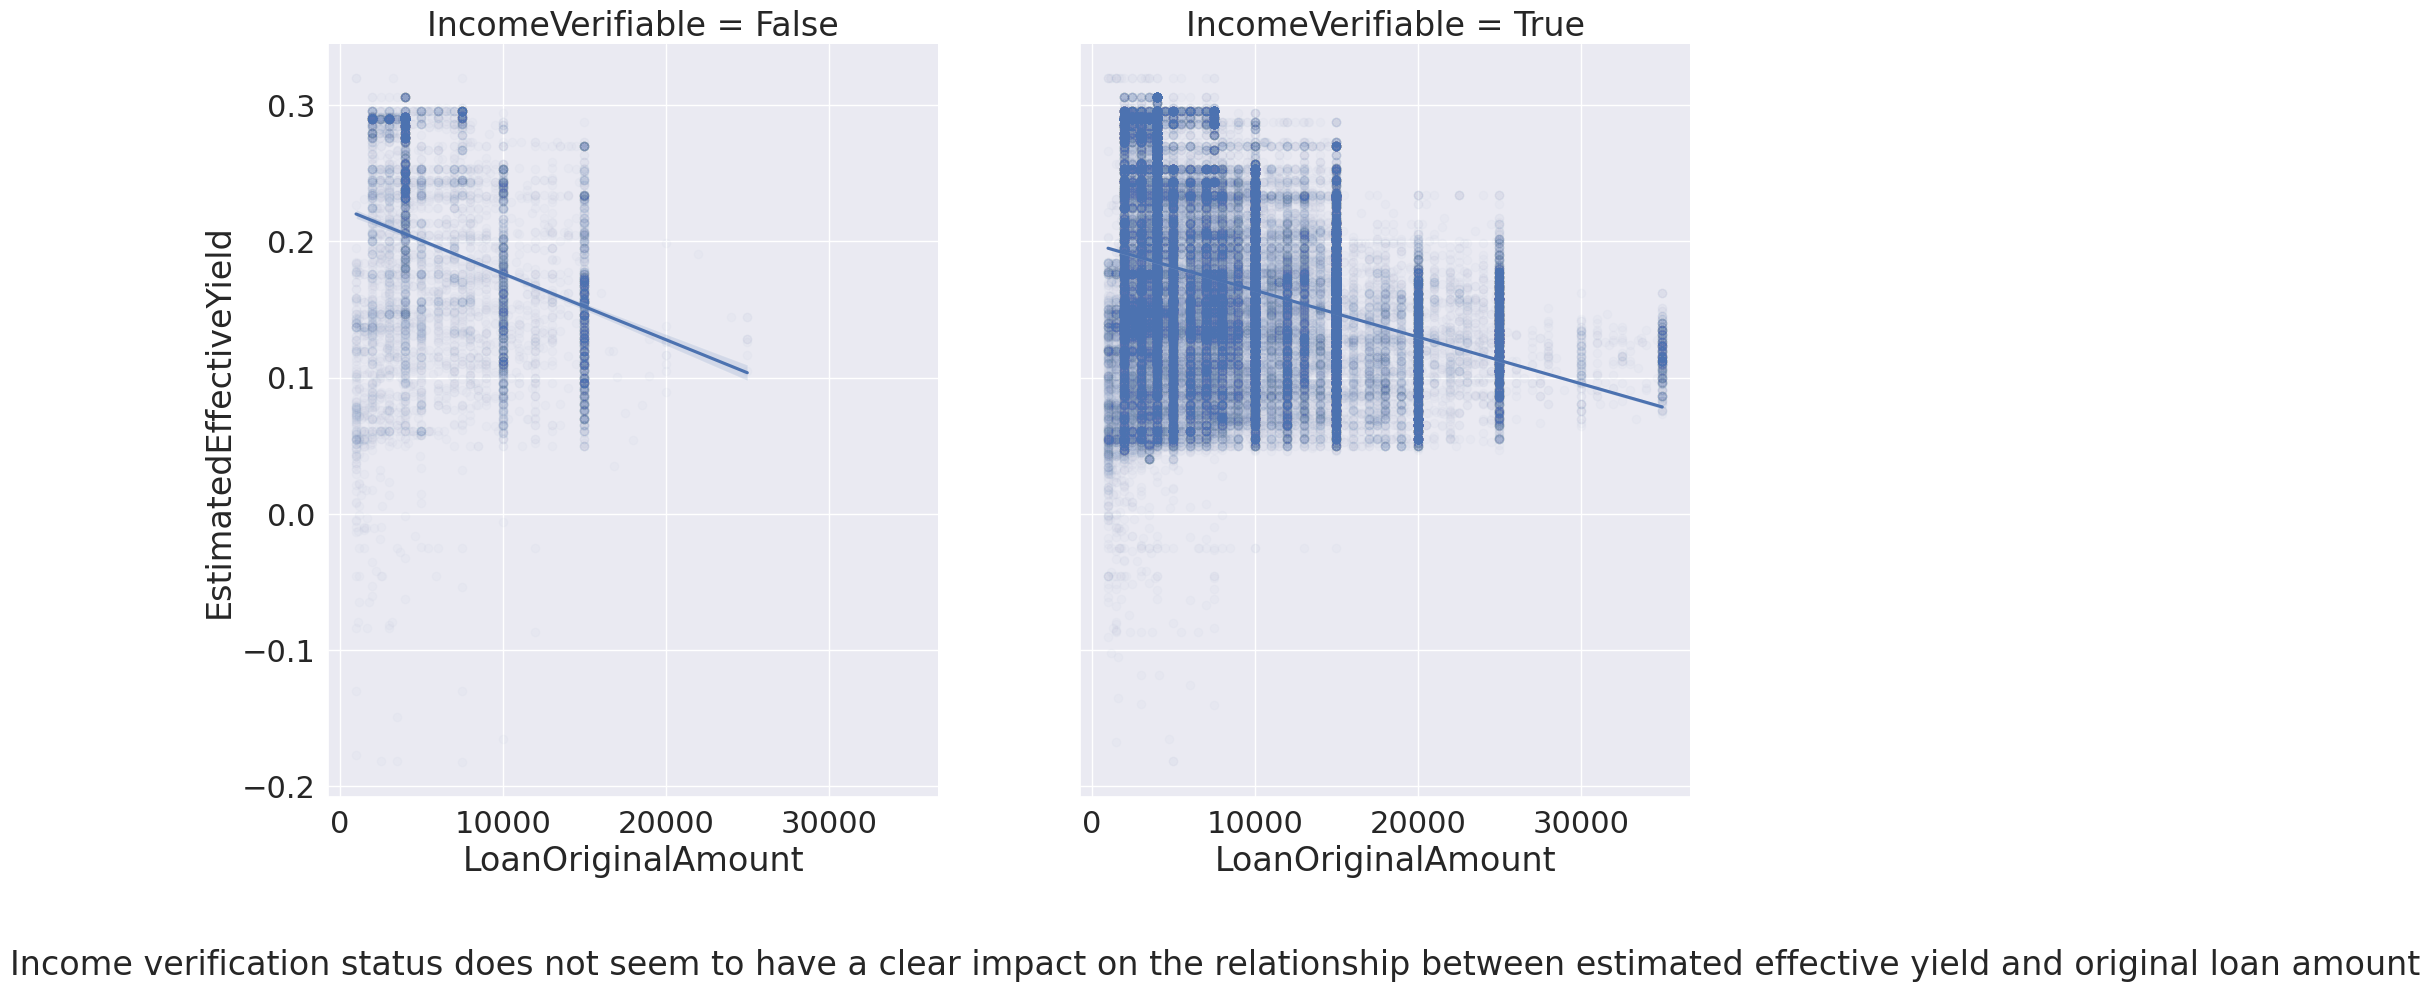

In [42]:
#regression plot across categorical variables and numerical variables
#increase font size of all elements
sns.set(font_scale=2)
g = sns.FacetGrid(data = loans_subset, col ='IncomeVerifiable' ,col_wrap = 2)
g.map(sns.regplot,'LoanOriginalAmount','EstimatedEffectiveYield',x_jitter = 0.05, scatter_kws = {'alpha': 0.02})
g.fig.set_size_inches(20,20)
plt.figtext(.1,.3,'Income verification status does not seem to have a clear impact on the relationship between estimated effective yield and original loan amount')
plt.show()

Based on the plot above, we can see that the verification status of income does not seem have a clear effect on the relationship between loan original amount and estimated effective yield. However, the plot below shows that employment status does seem to have an influence on the relationship between loan original amount and estimated effective yield. The correlation between loan original amount and estimated effective yield is only strong when employment status is either employed or other.

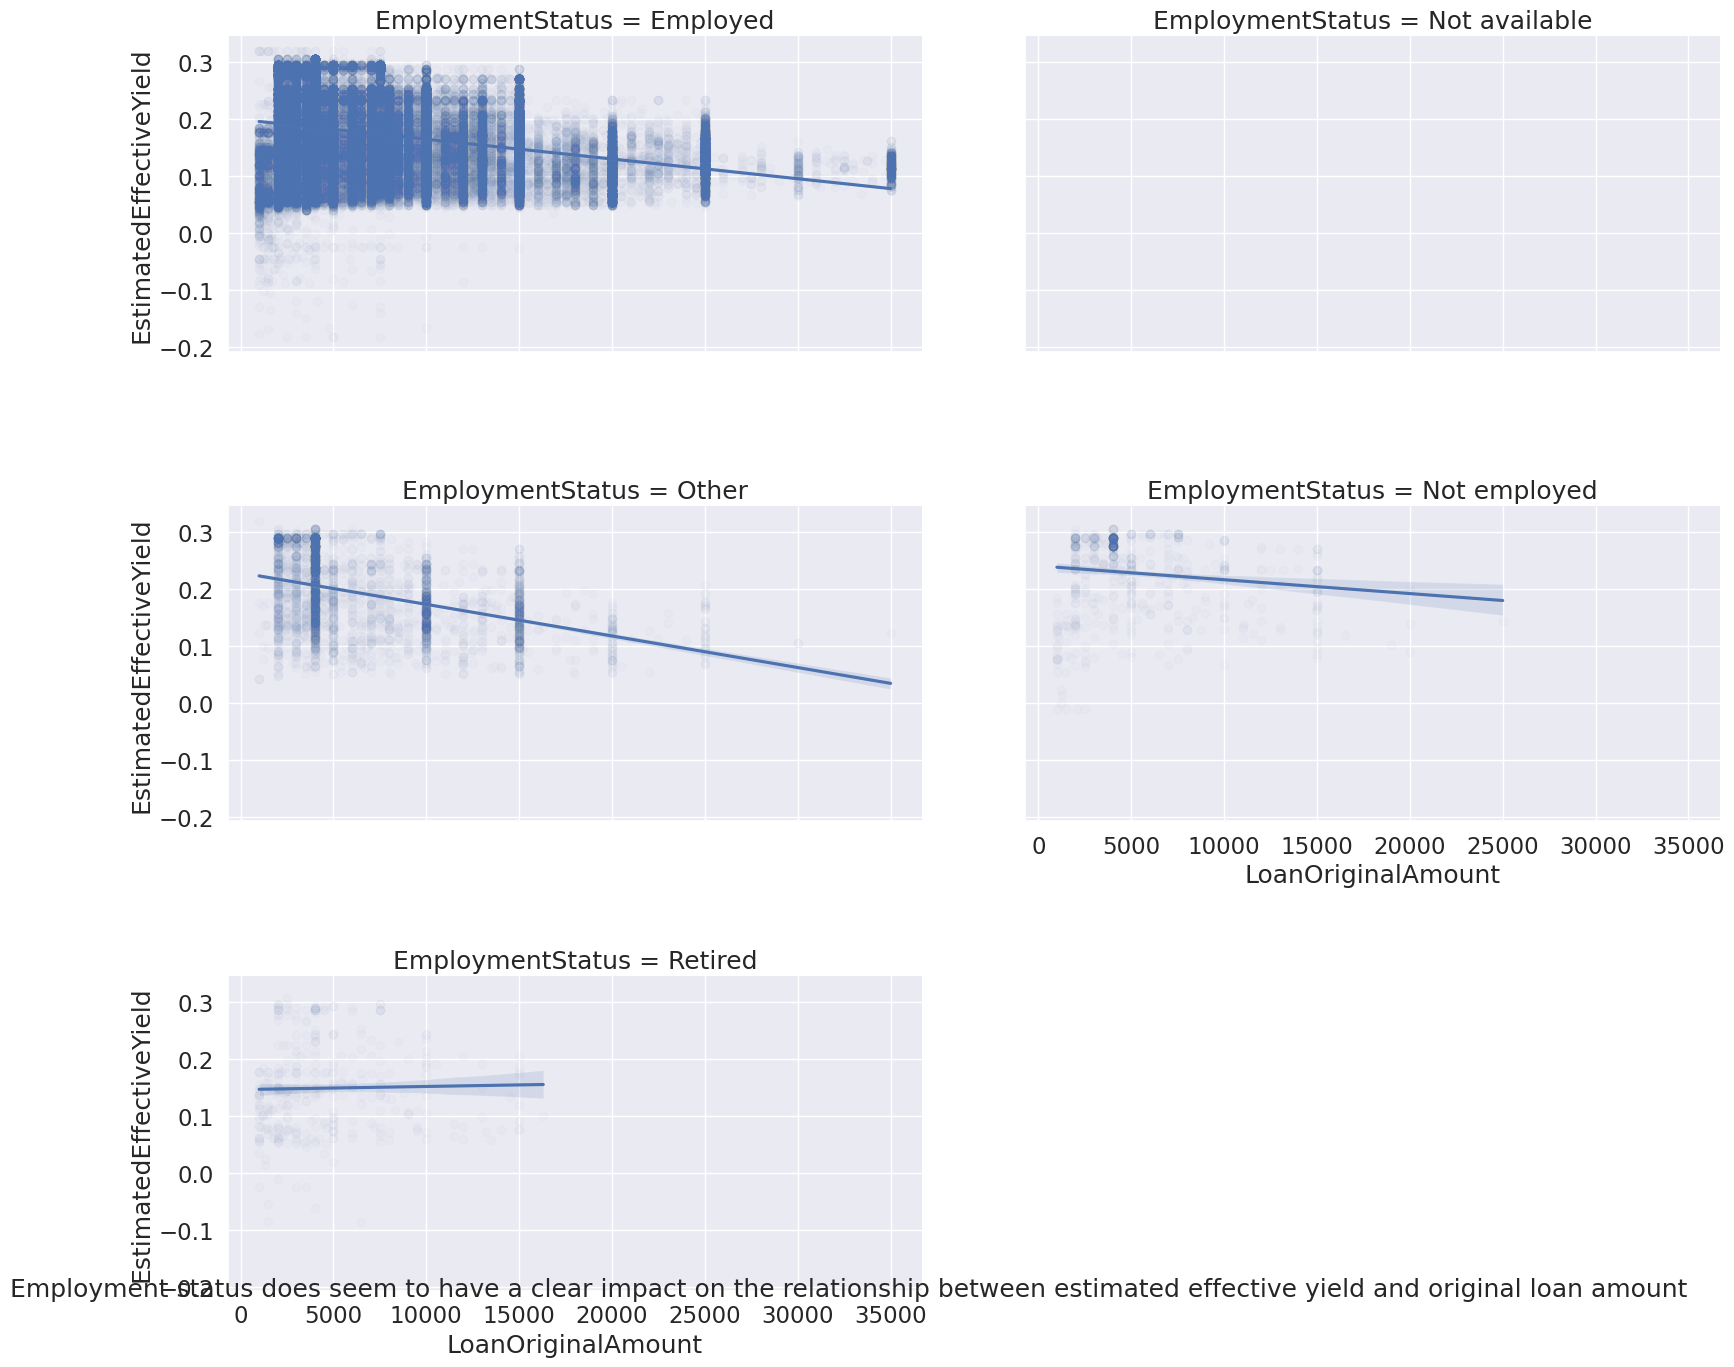

In [61]:
#regression plot across categorical variables and numerical variables
#increase font size of all elements
sns.set(font_scale=1.5)
g = sns.FacetGrid(data = loans_subset, col ='EmploymentStatus' ,col_wrap = 2)
g.map(sns.regplot,'LoanOriginalAmount','EstimatedEffectiveYield',x_jitter = 0.05, scatter_kws = {'alpha': 0.02})
g.fig.set_size_inches(20,15)
plt.figtext(.1,.1,'Employment status does seem to have a clear impact on the relationship between estimated effective yield and original loan amount')
plt.show()

On the other hand, we can also see that the relationship between estimated effective yield and original loan amount gets weaker when the prosper rating improves.

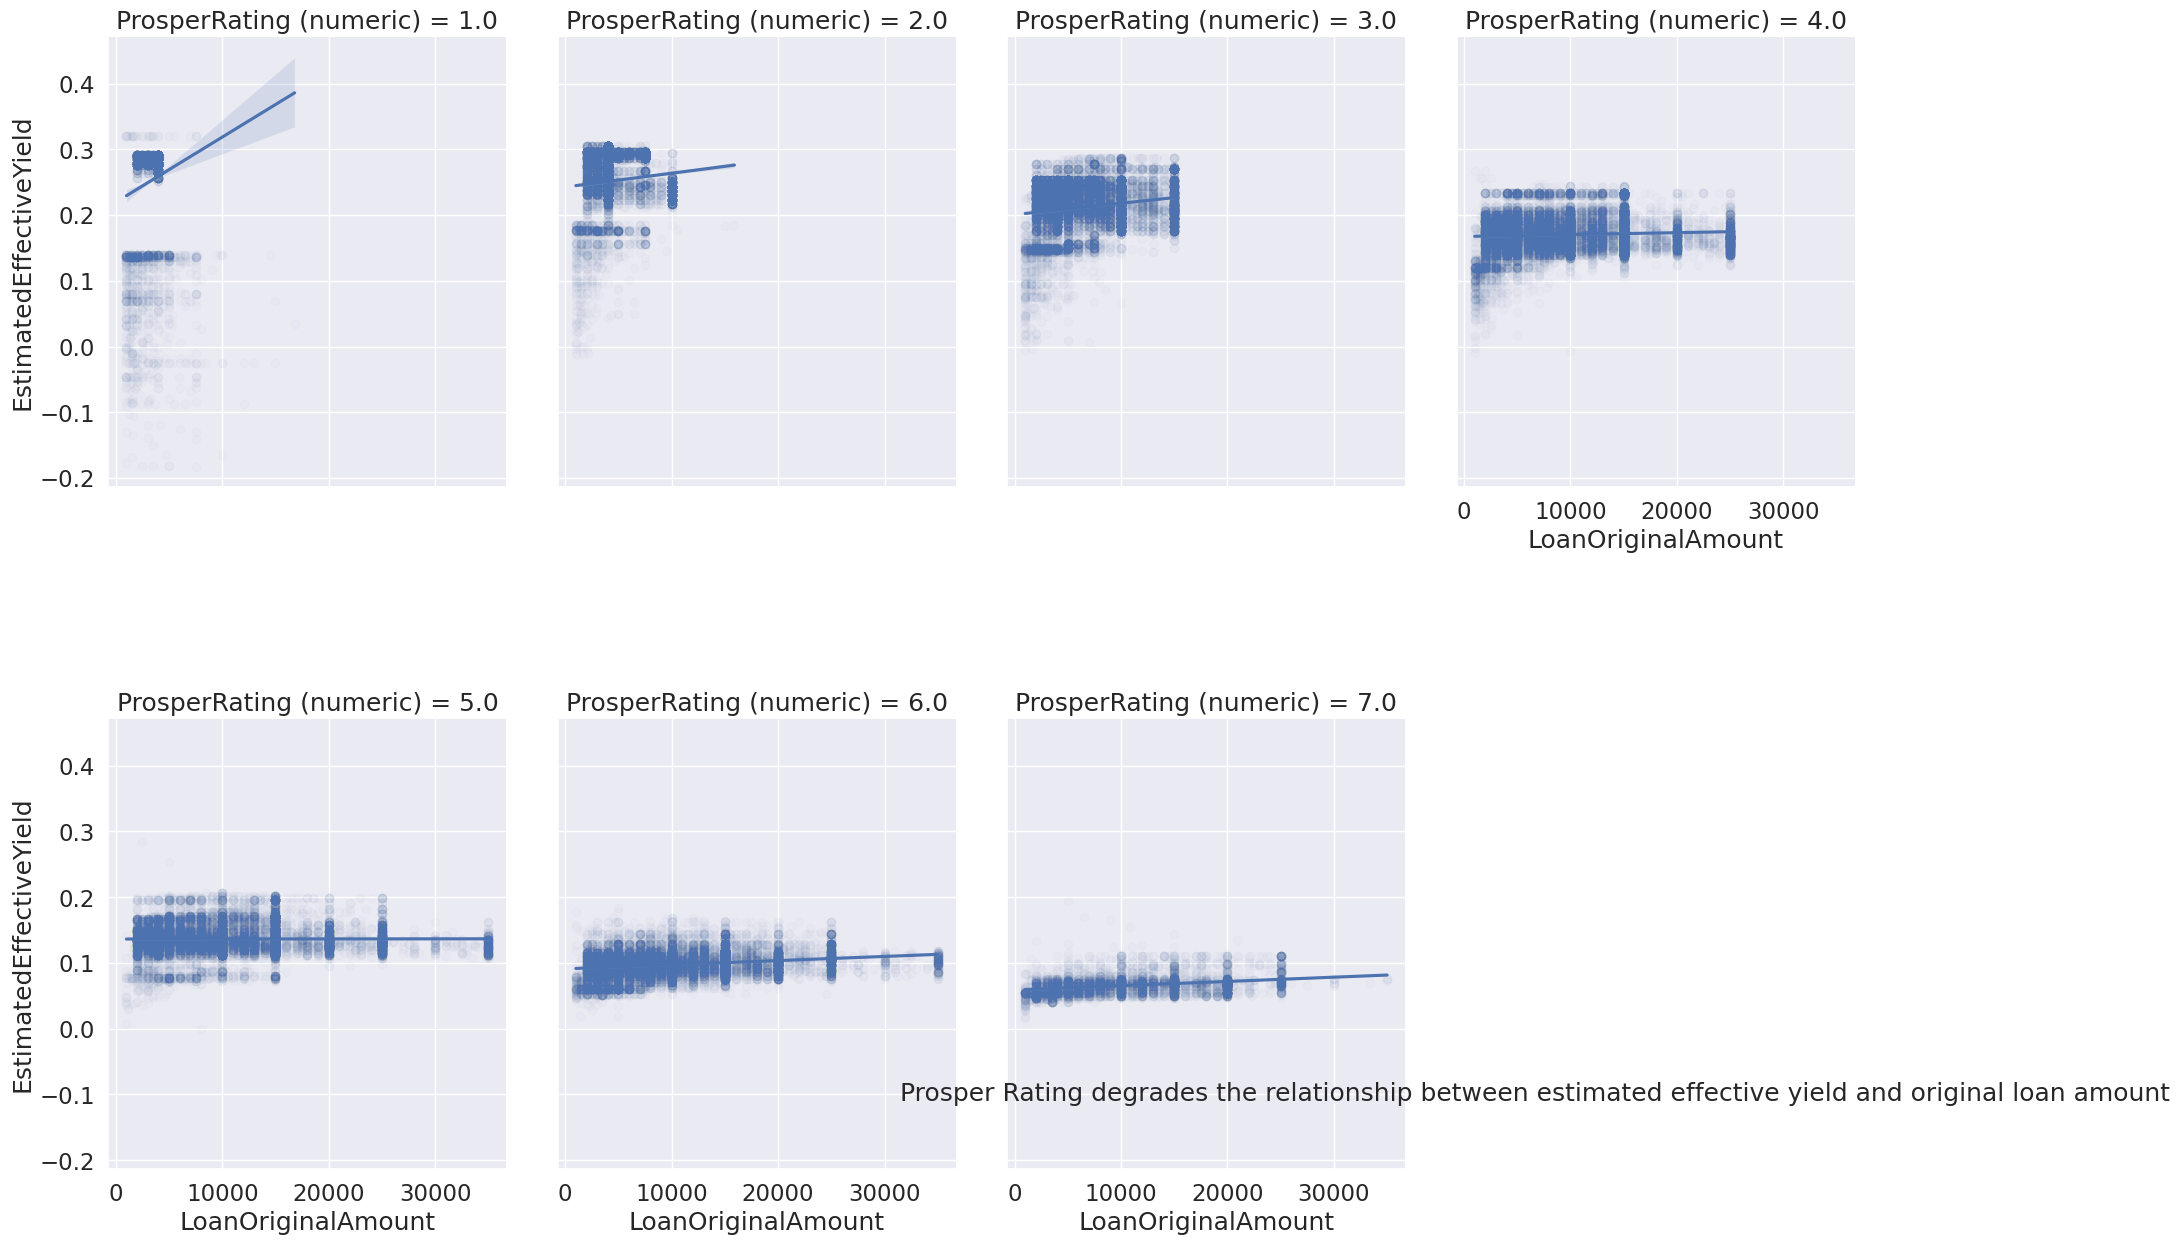

In [63]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(data = loans_subset, col ='ProsperRating (numeric)' ,col_wrap = 4)
g.map(sns.regplot,'LoanOriginalAmount','EstimatedEffectiveYield',x_jitter = 0.05, scatter_kws = {'alpha': 0.02})
g.fig.set_size_inches(20,15)
plt.figtext(.5,.2,'Prosper Rating degrades the relationship between estimated effective yield and original loan amount')
plt.show()

Next, let's take a look at the relationship between estimated effective yield and debt-to-income ratio.

Text(0.3, 0.1, 'Loan term does not seem to have a clear impact on the relationship between estimated effective yield and debt-to-income ratio')

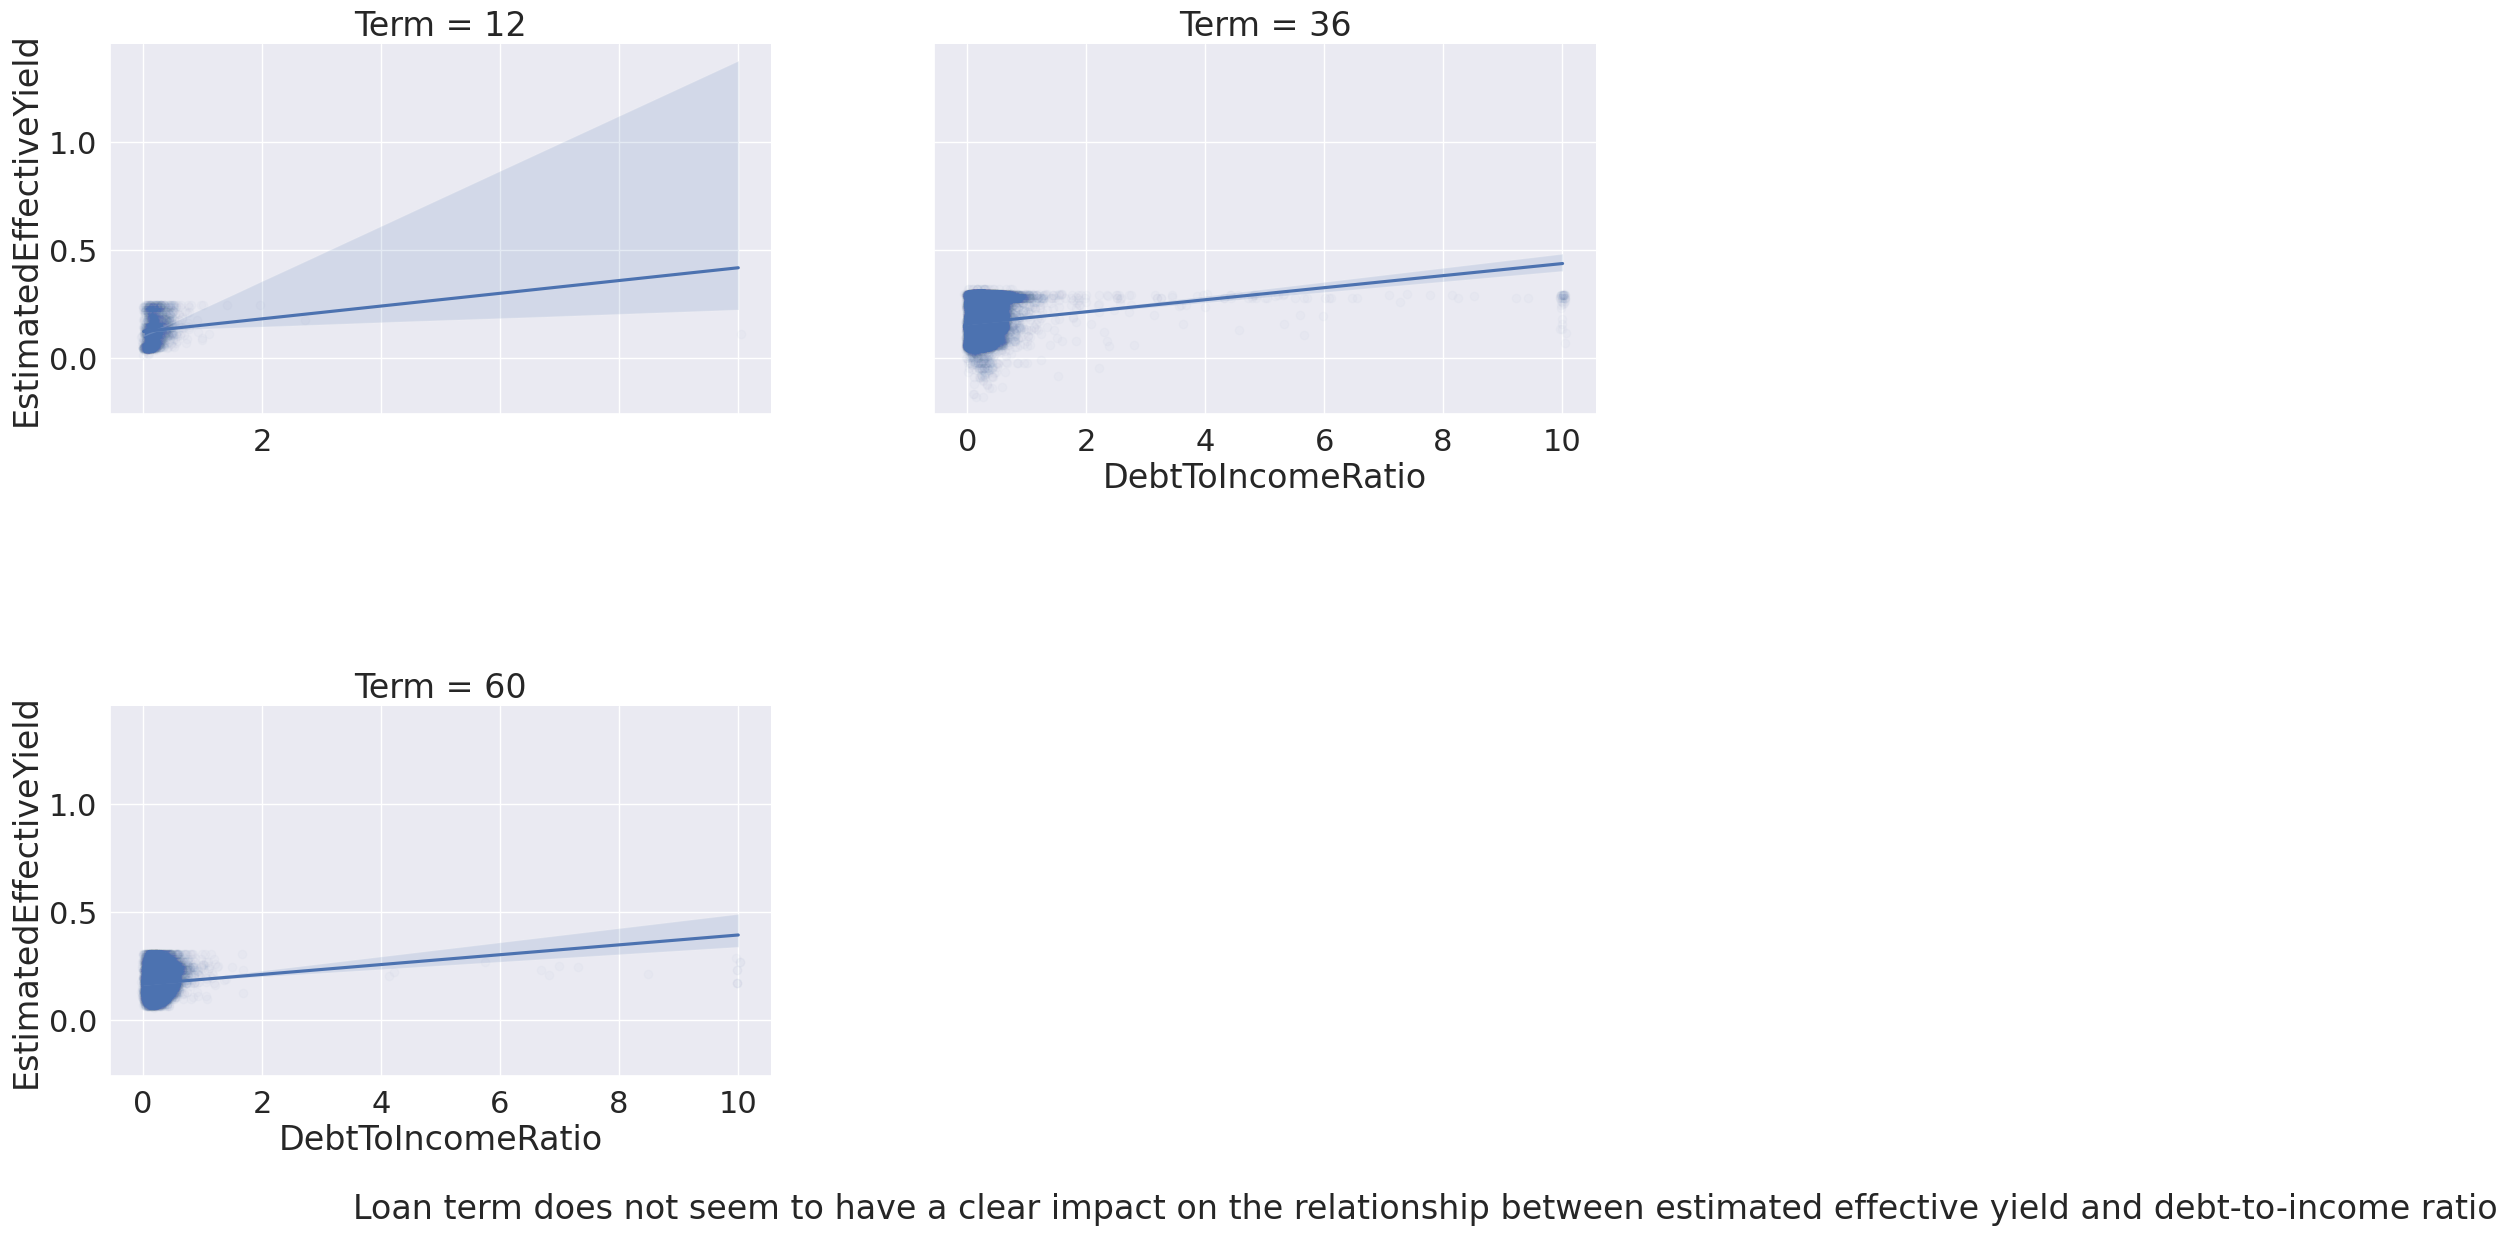

In [45]:
#regression plot across categorical variables and numerical variables
#increase font size of all elements
sns.set(font_scale=2)
g = sns.FacetGrid(data = loans_subset, col ='Term' ,col_wrap = 2)
g.map(sns.regplot,'DebtToIncomeRatio','EstimatedEffectiveYield',x_jitter = 0.05, scatter_kws = {'alpha': 0.02})
g.fig.set_size_inches(20,15)
plt.figtext(.3,.1,'Loan term does not seem to have a clear impact on the relationship between estimated effective yield and debt-to-income ratio')


Based on the regression plot between Debt-to-income ratio and Estimated Effective Yield, we can see both a positive relationship here, indicating that the higher the debt-to-income ratio, the higher the estimated effective yield for the investor. On the other hand, the loan term does not seem to have a clear impact on the relationship between debt-to-income ratio and estimated effective yield.

Based on the violin plot for estimated effective yield across terms and loan ratings, we can generally see that the average estimated effective yield is lower as the loan ratings improve. 

Another thing that we notice is how the average estimated effective yield varies across the 3 terms in the same loan ratings. The longer the term, the higher the average estimated effective yield in each prosper rating category.

Finally, distribution of estimated effective yield for loan term of 36 months in prosper rating of 1 is unimodal, while the distributions of estimated effective yield across other prosper ratings are multi-modal.

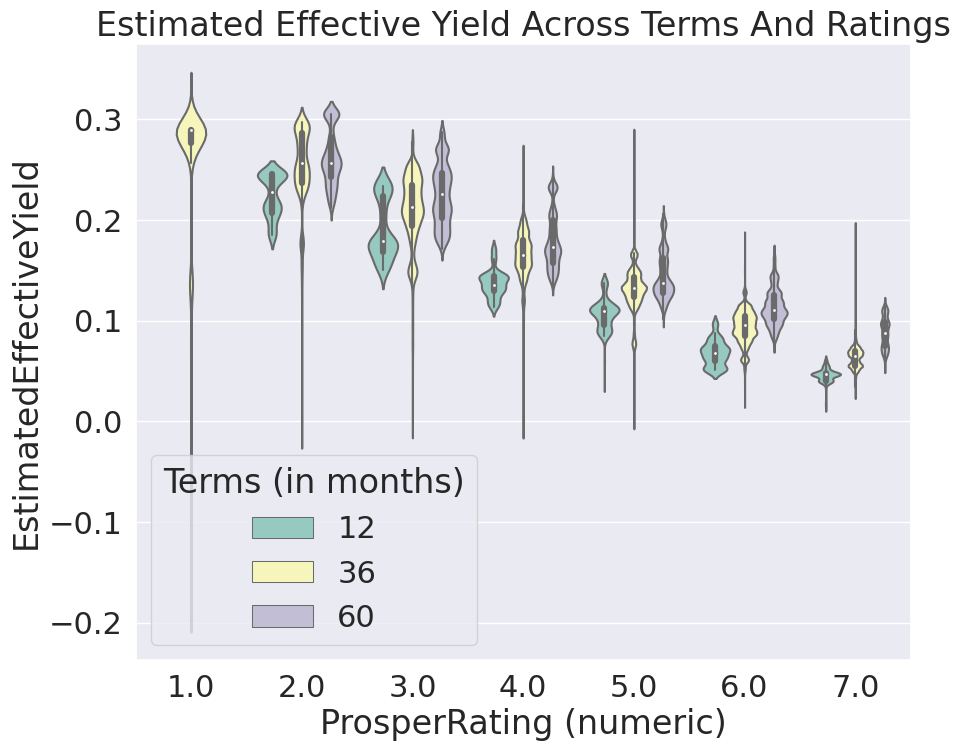

In [46]:
#violin plot

fig = plt.figure(figsize = [10, 8])
ax = sns.violinplot(x='ProsperRating (numeric)', y='EstimatedEffectiveYield', hue='Term',
                 data=loans_subset, palette="Set3")
plt.title('Estimated Effective Yield Across Terms And Ratings')
plt.legend(title = 'Terms (in months)');



Based on the heatmap below, the average estimated effective yield is highest in the group of unemployed and loan term 36 months. Also, the group of unemployed gets the highest range of average estimated effective yields. No data is plotted for unavailable employment status.

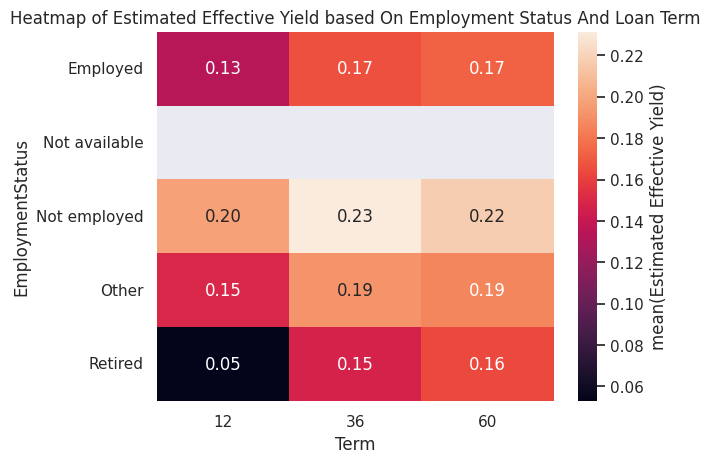

In [47]:


pivottable = loans_subset.groupby(['Term','EmploymentStatus'])['EstimatedEffectiveYield'].mean().reset_index(name = 'Estimated Effective Yield').pivot(columns = 'Term',index = 'EmploymentStatus',values = 'Estimated Effective Yield')
sns.set(font_scale=1)
sns.heatmap(pivottable,annot = True,fmt = '.2f',cbar_kws = {'label': 'mean(Estimated Effective Yield)'})
plt.title('Heatmap of Estimated Effective Yield based On Employment Status And Loan Term');

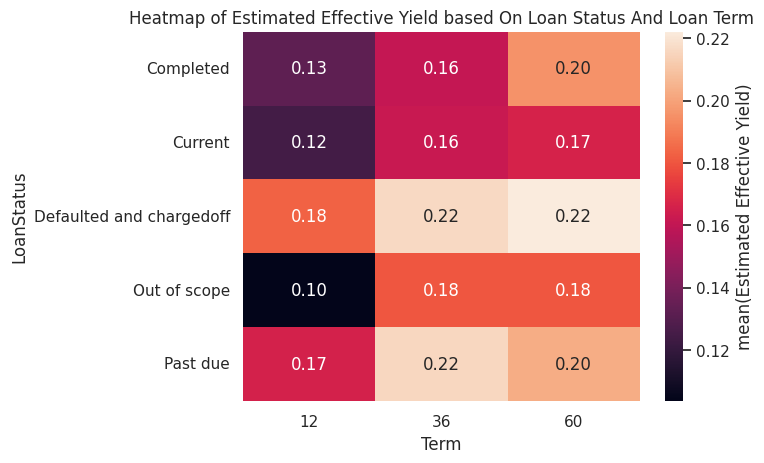

In [48]:


pivottable = loans_subset.groupby(['Term','LoanStatus'])['EstimatedEffectiveYield'].mean().reset_index(name = 'Estimated Effective Yield').pivot(columns = 'Term',index = 'LoanStatus',values = 'Estimated Effective Yield')
sns.set(font_scale=1)
sns.heatmap(pivottable,annot = True,fmt = '.2f',cbar_kws = {'label': 'mean(Estimated Effective Yield)'})
plt.title('Heatmap of Estimated Effective Yield based On Loan Status And Loan Term');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Loan term has an effect on the relationship between Original loan amount and estimated effective yield. The relationship gets stronger when loan term is greater than 12.

> Employment status does seem to have a clear impact on the relationship between estimated effective yield and original loan amount.

> the relationship between estimated effective yield and original loan amount gets weaker when the prosper rating improves.

> The average estimated effective yield is highest in the group of unemployed and loan term 36 months. Also, the group of unemployed gets the highest range of average estimated effective yields.

### Were there any interesting or surprising interactions between features?



> While the correlation coefficient between Original Loan Amount and Estimated Effective Yield is -0.33, indicating a negative relationship, yet depending on each individual employment status the relationship between Original Loan Amount and Estimated Effective Yield can be strong, weak or even non-existent.

> Similarly, the correlation coefficient between Original Loan Amount and Estimated Effective Yield is negative yet depending on the individual loan term, the relationship gets stronger when loan term is greater than 12.

> Finally, the correlation coefficient between Original Loan Amount and Estimated Effective Yield is negative yet as the prosper rating improves, the relationship gets weaker.

> These findings demonstrate the importance of looking at the data from different angles:univariate,bivariate and multivariate.


## Conclusions

Even though I am interested in both APR and estimated effective yield, it is clear from the early plotting results that APR and estimated effective yield are 2 sides of the same coin. Contextually, what is the gain of the the investors is the cost of the borrowers. Any factors that maximize the estimated effective yield also maximize the APR for borrowers. Therefore, the relationships i notice between estimated effective yield and other factors also apply to the the relationship between APR and these factors. Also, estimated effective yield and yield are closely related, just like how APR is closely linked to borrower rate. Therefore, the findings are focused on the the estimated effective yield only. Interestingly though, the distributions of APR and estimated effective yield are not identical.

Looking at the bivariate connections, there is a negative correlation between the original loan amount and the estimated effective yield/ APR, which indicates the higher the loan amount, the less estimated effective yield is expected. It is also interesting to see the seemingly positive relationship between the debt-to-income ratio and the estimated effective yield/ APR. This is also in line with the consistent story of higher risks imply higher return. 

The boxplot and violin plots also indicate that the higher the loan term becomes, the higher the estimated effective yield gets. Within the group of prosper rating of 2, Loan term of 12 months has the lowest average estimated effective yield, while the estimated effective yield for loan term of 36 months and 60 months are quite close.

Regarding the verification status of the income,the estimated effective yield is understandbly lower on average when income is verifiable. 

Regarding the homeownership status, the estimated effective yield is lower on average when the borrower is a homeowner. The original loan amount is higher on average when the borrower is a homeowner.

When we look at the violin plot, as the borrower's rating improves, the estimated effective yield decreases significantly. We also see that the estimated effective yield is the highest among the worse loan profiles (defaulted and charged off, past due) on average.

When we move to multivariate explorations, we can see that loan term can have an effect on the relationship between loan original amount and estimated effective yield. There is a stronger relationship between loan original amount and estimated effective yield when loan term is 36 or 60 months. However, loan term does not seem to have a clear impact on the relationship between debt-to-income ratio and estimated effective yield.


References:
    
https://towardsdatascience.com/simplest-way-of-creating-a-choropleth-map-by-u-s-states-in-python-f359ada7735e

https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

https://seaborn.pydata.org/generated/seaborn.violinplot.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

Dataset: https://t2a.io/assets/blog-move/uploads/2014/02/US_States.csv